In [1]:
library(Seurat)

library(dplyr)
library(glue)
library(ggplot2)
library(patchwork)
library(cowplot)
library(stringr)
library(tidyr)
library("dplyr")
library(velocyto.R)
library(stringr)
library(SeuratWrappers)
library(DAseq)
load("6_18.RData")

Attaching SeuratObject


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘glue’


The following object is masked from ‘package:dplyr’:

    collapse



Attaching package: ‘cowplot’


The following object is masked from ‘package:patchwork’:

    align_plots


Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack




In [4]:
for (c in levels(merged_obj)){
    tmp = subset(x = merged_obj, subset = seurat_clusters == c)
    degs = FindMarkers(tmp, verbose=T,slot="data",ident.1 = "mNFIXko", ident.2 = "mWT",
            group.by="orig.ident",logfc.threshold = 0.2,min.pct=0.05,min.diff.pct=0.05,test.used="wilcox",pseudocount.use=1)
    degs['fdr'] = p.adjust(degs$p_val, "BH")
    degs=degs[degs$fdr<=0.05,]
    print (c)
    print (degs["Cd74",])
    print (dim(degs))
#     write.table(degs,paste("Cluster",c,".DEG.orig.ident.tsv",sep=""),sep="\t")
#     if (dim(degs)[1]==0){next}
#     # UMAP plot
#     wt1 = WhichCells(merged_obj, expression = orig.ident == "mWT" & seurat_clusters==c)
#     ko1 = WhichCells(merged_obj, expression = orig.ident == "mNFIXko" & seurat_clusters==c)

#     DimPlot(merged_obj,reduction = 'wnn.umap', label=T, cells.highlight= list("mNFIXko"=ko1, "mWT"=wt1), 
#         cols.highlight = list("#E64B35","#4DBBD5"), cols= "grey100",repel = T, label.size = 5)+
#         scale_colour_manual(values = c("mNFIXko"="#E64B35","mWT"="#4DBBD5"))
#     ggsave(paste("Cluster",c,".UMAP.orig.ident.png", sep=""))
#     # Vlnplot
#     VlnPlot(tmp, features = rownames(degs),group.by="orig.ident",ncol=4,cols=c("mNFIXko"="#E64B35","mWT"="#4DBBD5"))+ NoLegend()
#     ggsave(paste("Cluster",c,".Vln.orig.ident.png", sep=""),height=as.integer(length(degs)/4+1)*6,width=7)
}

[1] "0"
   p_val avg_log2FC pct.1 pct.2 p_val_adj fdr
NA    NA         NA    NA    NA        NA  NA
[1] 11  6
[1] "1"
   p_val avg_log2FC pct.1 pct.2 p_val_adj fdr
NA    NA         NA    NA    NA        NA  NA
[1] 37  6
[1] "2"
           p_val avg_log2FC pct.1 pct.2 p_val_adj         fdr
Cd74 0.002836625  0.2216999 0.488 0.402         1 0.002836625
[1] 62  6
[1] "3"
   p_val avg_log2FC pct.1 pct.2 p_val_adj fdr
NA    NA         NA    NA    NA        NA  NA
[1] 78  6
[1] "4"
   p_val avg_log2FC pct.1 pct.2 p_val_adj fdr
NA    NA         NA    NA    NA        NA  NA
[1] 12  6
[1] "5"
   p_val avg_log2FC pct.1 pct.2 p_val_adj fdr
NA    NA         NA    NA    NA        NA  NA
[1] 41  6
[1] "6"
   p_val avg_log2FC pct.1 pct.2 p_val_adj fdr
NA    NA         NA    NA    NA        NA  NA
[1] 26  6
[1] "7"
            p_val avg_log2FC pct.1 pct.2 p_val_adj          fdr
Cd74 0.0003988826  0.3598497 0.368 0.237         1 0.0006980446
[1] 110   6
[1] "8"
   p_val avg_log2FC pct.1 pct.2 p_val_adj 

In [5]:
for (c in levels(merged_obj)){
    tmp = subset(x = merged_obj, subset = seurat_clusters == c)
    degs = FindMarkers(tmp, verbose=T,slot="data",ident.1 = "mNFIXko", ident.2 = "mWT",
            group.by="orig.ident",logfc.threshold = 0.1,min.pct=0.05,min.diff.pct=0.05,test.used="wilcox",pseudocount.use=1)
    degs['fdr'] = p.adjust(degs$p_val, "BH")
    degs=degs[degs$fdr<=0.05,]
    print (c)
    print (degs["Cd74",])
    print (dim(degs))
#     write.table(degs,paste("Cluster",c,".DEG.orig.ident.tsv",sep=""),sep="\t")
#     if (dim(degs)[1]==0){next}
#     # UMAP plot
#     wt1 = WhichCells(merged_obj, expression = orig.ident == "mWT" & seurat_clusters==c)
#     ko1 = WhichCells(merged_obj, expression = orig.ident == "mNFIXko" & seurat_clusters==c)

#     DimPlot(merged_obj,reduction = 'wnn.umap', label=T, cells.highlight= list("mNFIXko"=ko1, "mWT"=wt1), 
#         cols.highlight = list("#E64B35","#4DBBD5"), cols= "grey100",repel = T, label.size = 5)+
#         scale_colour_manual(values = c("mNFIXko"="#E64B35","mWT"="#4DBBD5"))
#     ggsave(paste("Cluster",c,".UMAP.orig.ident.png", sep=""))
#     # Vlnplot
#     VlnPlot(tmp, features = rownames(degs),group.by="orig.ident",ncol=4,cols=c("mNFIXko"="#E64B35","mWT"="#4DBBD5"))+ NoLegend()
#     ggsave(paste("Cluster",c,".Vln.orig.ident.png", sep=""),height=as.integer(length(degs)/4+1)*6,width=7)
}

[1] "0"
   p_val avg_log2FC pct.1 pct.2 p_val_adj fdr
NA    NA         NA    NA    NA        NA  NA
[1] 77  6
[1] "1"
   p_val avg_log2FC pct.1 pct.2 p_val_adj fdr
NA    NA         NA    NA    NA        NA  NA
[1] 277   6
[1] "2"
           p_val avg_log2FC pct.1 pct.2 p_val_adj         fdr
Cd74 0.002836625  0.2216999 0.488 0.402         1 0.003812916
[1] 493   6
[1] "3"
   p_val avg_log2FC pct.1 pct.2 p_val_adj fdr
NA    NA         NA    NA    NA        NA  NA
[1] 661   6
[1] "4"
   p_val avg_log2FC pct.1 pct.2 p_val_adj fdr
NA    NA         NA    NA    NA        NA  NA
[1] 145   6
[1] "5"
   p_val avg_log2FC pct.1 pct.2 p_val_adj fdr
NA    NA         NA    NA    NA        NA  NA
[1] 363   6
[1] "6"
   p_val avg_log2FC pct.1 pct.2 p_val_adj fdr
NA    NA         NA    NA    NA        NA  NA
[1] 308   6
[1] "7"
            p_val avg_log2FC pct.1 pct.2 p_val_adj         fdr
Cd74 0.0003988826  0.3598497 0.368 0.237         1 0.003724304
[1] 775   6
[1] "8"
   p_val avg_log2FC pct.1 pct.2 

In [6]:
for (c in levels(merged_obj)){
    tmp = subset(x = merged_obj, subset = seurat_clusters == c)
    degs = FindMarkers(tmp, verbose=T,slot="data",ident.1 = "mNFIXko", ident.2 = "mWT",
            group.by="orig.ident",logfc.threshold = 0.1,min.pct=0.1,min.diff.pct=0.1,test.used="wilcox",pseudocount.use=1)
    degs['fdr'] = p.adjust(degs$p_val, "BH")
    degs=degs[degs$fdr<=0.1,]
    print (c)
    print (degs["Cd74",])
    print (dim(degs))
#     write.table(degs,paste("Cluster",c,".DEG.orig.ident.tsv",sep=""),sep="\t")
#     if (dim(degs)[1]==0){next}
#     # UMAP plot
#     wt1 = WhichCells(merged_obj, expression = orig.ident == "mWT" & seurat_clusters==c)
#     ko1 = WhichCells(merged_obj, expression = orig.ident == "mNFIXko" & seurat_clusters==c)

#     DimPlot(merged_obj,reduction = 'wnn.umap', label=T, cells.highlight= list("mNFIXko"=ko1, "mWT"=wt1), 
#         cols.highlight = list("#E64B35","#4DBBD5"), cols= "grey100",repel = T, label.size = 5)+
#         scale_colour_manual(values = c("mNFIXko"="#E64B35","mWT"="#4DBBD5"))
#     ggsave(paste("Cluster",c,".UMAP.orig.ident.png", sep=""))
#     # Vlnplot
#     VlnPlot(tmp, features = rownames(degs),group.by="orig.ident",ncol=4,cols=c("mNFIXko"="#E64B35","mWT"="#4DBBD5"))+ NoLegend()
#     ggsave(paste("Cluster",c,".Vln.orig.ident.png", sep=""),height=as.integer(length(degs)/4+1)*6,width=7)
}

[1] "0"
   p_val avg_log2FC pct.1 pct.2 p_val_adj fdr
NA    NA         NA    NA    NA        NA  NA
[1] 39  6
[1] "1"
   p_val avg_log2FC pct.1 pct.2 p_val_adj fdr
NA    NA         NA    NA    NA        NA  NA
[1] 157   6
[1] "2"
   p_val avg_log2FC pct.1 pct.2 p_val_adj fdr
NA    NA         NA    NA    NA        NA  NA
[1] 163   6
[1] "3"
   p_val avg_log2FC pct.1 pct.2 p_val_adj fdr
NA    NA         NA    NA    NA        NA  NA
[1] 213   6
[1] "4"
   p_val avg_log2FC pct.1 pct.2 p_val_adj fdr
NA    NA         NA    NA    NA        NA  NA
[1] 103   6
[1] "5"
   p_val avg_log2FC pct.1 pct.2 p_val_adj fdr
NA    NA         NA    NA    NA        NA  NA
[1] 111   6
[1] "6"
   p_val avg_log2FC pct.1 pct.2 p_val_adj fdr
NA    NA         NA    NA    NA        NA  NA
[1] 143   6
[1] "7"
            p_val avg_log2FC pct.1 pct.2 p_val_adj         fdr
Cd74 0.0003988826  0.3598497 0.368 0.237         1 0.002232635
[1] 401   6
[1] "8"
   p_val avg_log2FC pct.1 pct.2 p_val_adj fdr
NA    NA         N

In [7]:
for (c in levels(merged_obj)){
    tmp = subset(x = merged_obj, subset = seurat_clusters == c)
    degs = FindMarkers(tmp, verbose=T,slot="data",ident.1 = "mNFIXko", ident.2 = "mWT",
            group.by="orig.ident",logfc.threshold = 0.1,min.pct=0.1,min.diff.pct=0.1,test.used="wilcox",pseudocount.use=1)
    degs['fdr'] = p.adjust(degs$p_val, "BH")
    degs=degs[degs$fdr<=0.05,]
    print (c)
    print (degs["Cd74",])
    print (dim(degs))
#     write.table(degs,paste("Cluster",c,".DEG.orig.ident.tsv",sep=""),sep="\t")
#     if (dim(degs)[1]==0){next}
#     # UMAP plot
#     wt1 = WhichCells(merged_obj, expression = orig.ident == "mWT" & seurat_clusters==c)
#     ko1 = WhichCells(merged_obj, expression = orig.ident == "mNFIXko" & seurat_clusters==c)

#     DimPlot(merged_obj,reduction = 'wnn.umap', label=T, cells.highlight= list("mNFIXko"=ko1, "mWT"=wt1), 
#         cols.highlight = list("#E64B35","#4DBBD5"), cols= "grey100",repel = T, label.size = 5)+
#         scale_colour_manual(values = c("mNFIXko"="#E64B35","mWT"="#4DBBD5"))
#     ggsave(paste("Cluster",c,".UMAP.orig.ident.png", sep=""))
#     # Vlnplot
#     VlnPlot(tmp, features = rownames(degs),group.by="orig.ident",ncol=4,cols=c("mNFIXko"="#E64B35","mWT"="#4DBBD5"))+ NoLegend()
#     ggsave(paste("Cluster",c,".Vln.orig.ident.png", sep=""),height=as.integer(length(degs)/4+1)*6,width=7)
}

[1] "0"
   p_val avg_log2FC pct.1 pct.2 p_val_adj fdr
NA    NA         NA    NA    NA        NA  NA
[1] 39  6
[1] "1"
   p_val avg_log2FC pct.1 pct.2 p_val_adj fdr
NA    NA         NA    NA    NA        NA  NA
[1] 157   6
[1] "2"
   p_val avg_log2FC pct.1 pct.2 p_val_adj fdr
NA    NA         NA    NA    NA        NA  NA
[1] 163   6
[1] "3"
   p_val avg_log2FC pct.1 pct.2 p_val_adj fdr
NA    NA         NA    NA    NA        NA  NA
[1] 213   6
[1] "4"
   p_val avg_log2FC pct.1 pct.2 p_val_adj fdr
NA    NA         NA    NA    NA        NA  NA
[1] 103   6
[1] "5"
   p_val avg_log2FC pct.1 pct.2 p_val_adj fdr
NA    NA         NA    NA    NA        NA  NA
[1] 111   6
[1] "6"
   p_val avg_log2FC pct.1 pct.2 p_val_adj fdr
NA    NA         NA    NA    NA        NA  NA
[1] 141   6
[1] "7"
            p_val avg_log2FC pct.1 pct.2 p_val_adj         fdr
Cd74 0.0003988826  0.3598497 0.368 0.237         1 0.002232635
[1] 384   6
[1] "8"
   p_val avg_log2FC pct.1 pct.2 p_val_adj fdr
NA    NA         N

In [8]:
for (c in levels(merged_obj)){
    tmp = subset(x = merged_obj, subset = seurat_clusters == c)
    degs = FindMarkers(tmp, verbose=T,slot="data",ident.1 = "mNFIXko", ident.2 = "mWT",
            group.by="orig.ident",logfc.threshold = 0.1,min.pct=0.1,min.diff.pct=0.1,test.used="wilcox",pseudocount.use=1)
    degs['fdr'] = p.adjust(degs$p_val, "BH")
    degs=degs[degs$fdr<=0.01,]
    print (c)
    print (degs["Cd74",])
    print (dim(degs))
#     write.table(degs,paste("Cluster",c,".DEG.orig.ident.tsv",sep=""),sep="\t")
#     if (dim(degs)[1]==0){next}
#     # UMAP plot
#     wt1 = WhichCells(merged_obj, expression = orig.ident == "mWT" & seurat_clusters==c)
#     ko1 = WhichCells(merged_obj, expression = orig.ident == "mNFIXko" & seurat_clusters==c)

#     DimPlot(merged_obj,reduction = 'wnn.umap', label=T, cells.highlight= list("mNFIXko"=ko1, "mWT"=wt1), 
#         cols.highlight = list("#E64B35","#4DBBD5"), cols= "grey100",repel = T, label.size = 5)+
#         scale_colour_manual(values = c("mNFIXko"="#E64B35","mWT"="#4DBBD5"))
#     ggsave(paste("Cluster",c,".UMAP.orig.ident.png", sep=""))
#     # Vlnplot
#     VlnPlot(tmp, features = rownames(degs),group.by="orig.ident",ncol=4,cols=c("mNFIXko"="#E64B35","mWT"="#4DBBD5"))+ NoLegend()
#     ggsave(paste("Cluster",c,".Vln.orig.ident.png", sep=""),height=as.integer(length(degs)/4+1)*6,width=7)
}

[1] "0"
   p_val avg_log2FC pct.1 pct.2 p_val_adj fdr
NA    NA         NA    NA    NA        NA  NA
[1] 39  6
[1] "1"
   p_val avg_log2FC pct.1 pct.2 p_val_adj fdr
NA    NA         NA    NA    NA        NA  NA
[1] 157   6
[1] "2"
   p_val avg_log2FC pct.1 pct.2 p_val_adj fdr
NA    NA         NA    NA    NA        NA  NA
[1] 162   6
[1] "3"
   p_val avg_log2FC pct.1 pct.2 p_val_adj fdr
NA    NA         NA    NA    NA        NA  NA
[1] 207   6
[1] "4"
   p_val avg_log2FC pct.1 pct.2 p_val_adj fdr
NA    NA         NA    NA    NA        NA  NA
[1] 102   6
[1] "5"
   p_val avg_log2FC pct.1 pct.2 p_val_adj fdr
NA    NA         NA    NA    NA        NA  NA
[1] 110   6
[1] "6"
   p_val avg_log2FC pct.1 pct.2 p_val_adj fdr
NA    NA         NA    NA    NA        NA  NA
[1] 126   6
[1] "7"
            p_val avg_log2FC pct.1 pct.2 p_val_adj         fdr
Cd74 0.0003988826  0.3598497 0.368 0.237         1 0.002232635
[1] 220   6
[1] "8"
   p_val avg_log2FC pct.1 pct.2 p_val_adj fdr
NA    NA         N

In [9]:
for (c in levels(merged_obj)){
    tmp = subset(x = merged_obj, subset = seurat_clusters == c)
    degs = FindMarkers(tmp, verbose=T,slot="data",ident.1 = "mNFIXko", ident.2 = "mWT",
            group.by="orig.ident",logfc.threshold = 0.2,min.pct=0.1,min.diff.pct=0.1,test.used="wilcox",pseudocount.use=1)
    degs['fdr'] = p.adjust(degs$p_val, "BH")

    print (c)
    print (dim(degs[degs$fdr<=0.01,]))
    print (dim(degs[degs$fdr<=0.05,]))
    print (dim(degs[degs$fdr<=0.1,]))
#     write.table(degs,paste("Cluster",c,".DEG.orig.ident.tsv",sep=""),sep="\t")
#     if (dim(degs)[1]==0){next}
#     # UMAP plot
#     wt1 = WhichCells(merged_obj, expression = orig.ident == "mWT" & seurat_clusters==c)
#     ko1 = WhichCells(merged_obj, expression = orig.ident == "mNFIXko" & seurat_clusters==c)

#     DimPlot(merged_obj,reduction = 'wnn.umap', label=T, cells.highlight= list("mNFIXko"=ko1, "mWT"=wt1), 
#         cols.highlight = list("#E64B35","#4DBBD5"), cols= "grey100",repel = T, label.size = 5)+
#         scale_colour_manual(values = c("mNFIXko"="#E64B35","mWT"="#4DBBD5"))
#     ggsave(paste("Cluster",c,".UMAP.orig.ident.png", sep=""))
#     # Vlnplot
#     VlnPlot(tmp, features = rownames(degs),group.by="orig.ident",ncol=4,cols=c("mNFIXko"="#E64B35","mWT"="#4DBBD5"))+ NoLegend()
#     ggsave(paste("Cluster",c,".Vln.orig.ident.png", sep=""),height=as.integer(length(degs)/4+1)*6,width=7)
}

[1] "0"
[1] 9 6
[1] 9 6
[1] 9 6
[1] "1"
[1] 23  6
[1] 23  6
[1] 23  6
[1] "2"
[1] 41  6
[1] 41  6
[1] 41  6
[1] "3"
[1] 49  6
[1] 50  6
[1] 50  6
[1] "4"
[1] 9 6
[1] 9 6
[1] 9 6
[1] "5"
[1] 28  6
[1] 28  6
[1] 28  6
[1] "6"
[1] 18  6
[1] 18  6
[1] 18  6
[1] "7"
[1] 80  6
[1] 83  6
[1] 83  6
[1] "8"
[1] 80  6
[1] 83  6
[1] 83  6
[1] "9"
[1] 76  6
[1] 82  6
[1] 82  6
[1] "10"
[1] 40  6
[1] 41  6
[1] 41  6
[1] "11"
[1] 26  6
[1] 26  6
[1] 26  6
[1] "12"
[1] 17  6
[1] 17  6
[1] 17  6
[1] "13"
[1] 92  6
[1] 107   6
[1] 108   6
[1] "14"
[1] 2 6
[1] 106   6
[1] 415   6
[1] "15"
[1] 1 6
[1] 1 6
[1] 2 6
[1] "16"
[1] 0 6
[1] 0 6
[1] 0 6


In [10]:
for (c in levels(merged_obj)){
    tmp = subset(x = merged_obj, subset = seurat_clusters == c)
    degs = FindMarkers(tmp, verbose=T,slot="data",ident.1 = "mNFIXko", ident.2 = "mWT",
            group.by="orig.ident",logfc.threshold = 0.2,test.used="wilcox",pseudocount.use=1)
    degs['fdr'] = p.adjust(degs$p_val, "BH")

    print (c)
    print (degs["Cd74",])
    print (dim(degs[degs$fdr<=0.01,]))
    print (dim(degs[degs$fdr<=0.05,]))
    print (dim(degs[degs$fdr<=0.1,]))
#     write.table(degs,paste("Cluster",c,".DEG.orig.ident.tsv",sep=""),sep="\t")
#     if (dim(degs)[1]==0){next}
#     # UMAP plot
#     wt1 = WhichCells(merged_obj, expression = orig.ident == "mWT" & seurat_clusters==c)
#     ko1 = WhichCells(merged_obj, expression = orig.ident == "mNFIXko" & seurat_clusters==c)

#     DimPlot(merged_obj,reduction = 'wnn.umap', label=T, cells.highlight= list("mNFIXko"=ko1, "mWT"=wt1), 
#         cols.highlight = list("#E64B35","#4DBBD5"), cols= "grey100",repel = T, label.size = 5)+
#         scale_colour_manual(values = c("mNFIXko"="#E64B35","mWT"="#4DBBD5"))
#     ggsave(paste("Cluster",c,".UMAP.orig.ident.png", sep=""))
#     # Vlnplot
#     VlnPlot(tmp, features = rownames(degs),group.by="orig.ident",ncol=4,cols=c("mNFIXko"="#E64B35","mWT"="#4DBBD5"))+ NoLegend()
#     ggsave(paste("Cluster",c,".Vln.orig.ident.png", sep=""),height=as.integer(length(degs)/4+1)*6,width=7)
}

[1] "0"
   p_val avg_log2FC pct.1 pct.2 p_val_adj fdr
NA    NA         NA    NA    NA        NA  NA
[1] 31  6
[1] 31  6
[1] 31  6
[1] "1"
   p_val avg_log2FC pct.1 pct.2 p_val_adj fdr
NA    NA         NA    NA    NA        NA  NA
[1] 69  6
[1] 70  6
[1] 71  6
[1] "2"
           p_val avg_log2FC pct.1 pct.2 p_val_adj         fdr
Cd74 0.002836625  0.2216999 0.488 0.402         1 0.002964114
[1] 92  6
[1] 92  6
[1] 93  6
[1] "3"
   p_val avg_log2FC pct.1 pct.2 p_val_adj fdr
NA    NA         NA    NA    NA        NA  NA
[1] 116   6
[1] 120   6
[1] 120   6
[1] "4"
   p_val avg_log2FC pct.1 pct.2 p_val_adj fdr
NA    NA         NA    NA    NA        NA  NA
[1] 45  6
[1] 46  6
[1] 46  6
[1] "5"
   p_val avg_log2FC pct.1 pct.2 p_val_adj fdr
NA    NA         NA    NA    NA        NA  NA
[1] 72  6
[1] 77  6
[1] 77  6
[1] "6"
   p_val avg_log2FC pct.1 pct.2 p_val_adj fdr
NA    NA         NA    NA    NA        NA  NA
[1] 71  6
[1] 71  6
[1] 71  6
[1] "7"
            p_val avg_log2FC pct.1 pct.2 p_v

In [2]:
for (c in levels(merged_obj)){
    tmp = subset(x = merged_obj, subset = seurat_clusters == c)
    degs = FindMarkers(tmp, verbose=T,slot="data",ident.1 = "mNFIXko", ident.2 = "mWT",
            group.by="orig.ident",logfc.threshold = 0.2,test.used="wilcox",pseudocount.use=1)
    degs['fdr'] = p.adjust(degs$p_val, "BH")
    degs = degs[degs$fdr<=0.01,]
    print (c)
    write.table(degs,paste("Cluster",c,".DEG.orig.ident.logFC02.FDR001.tsv",sep=""),sep="\t")
    if (dim(degs)[1]==0){next}
    # UMAP plot
    wt1 = WhichCells(merged_obj, expression = orig.ident == "mWT" & seurat_clusters==c)
    ko1 = WhichCells(merged_obj, expression = orig.ident == "mNFIXko" & seurat_clusters==c)

    DimPlot(merged_obj,reduction = 'wnn.umap', label=T, cells.highlight= list("mNFIXko"=ko1, "mWT"=wt1), 
        cols.highlight = list("#E64B35","#4DBBD5"), cols= "grey100",repel = T, label.size = 5)+
        scale_colour_manual(values = c("mNFIXko"="#E64B35","mWT"="#4DBBD5"))
    ggsave(paste("Cluster",c,".UMAP.orig.ident.png", sep=""))
    # Vlnplot
    degs = head(degs,n=50)
    a=VlnPlot(tmp, features = rownames(degs),group.by="orig.ident",ncol=4,cols=c("mNFIXko"="#E64B35","mWT"="#4DBBD5"))+ NoLegend()
    ggsave(paste("Cluster",c,".Vln.orig.ident.png", sep=""),plot=a,height=as.integer(length(degs)/4+1)*20,width=7,dpi=50)
}

[1] "0"


Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Saving 6.67 x 6.67 in image



[1] "1"


Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Saving 6.67 x 6.67 in image



[1] "2"


Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Saving 6.67 x 6.67 in image



[1] "3"


Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Saving 6.67 x 6.67 in image



[1] "4"


Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Saving 6.67 x 6.67 in image



[1] "5"


Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Saving 6.67 x 6.67 in image



[1] "6"


Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Saving 6.67 x 6.67 in image



[1] "7"


Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Saving 6.67 x 6.67 in image



[1] "8"


Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Saving 6.67 x 6.67 in image



[1] "9"


Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Saving 6.67 x 6.67 in image



[1] "10"


Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Saving 6.67 x 6.67 in image



[1] "11"


Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Saving 6.67 x 6.67 in image



[1] "12"


Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Saving 6.67 x 6.67 in image



[1] "13"


Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Saving 6.67 x 6.67 in image



[1] "14"


Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Saving 6.67 x 6.67 in image



[1] "15"


Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Saving 6.67 x 6.67 in image



[1] "16"


In [3]:
c="1"
df = read.table(paste("Cluster",c,".DEG.orig.ident.logFC02.FDR001.tsv",sep=""),header=T)
head(df)

p_val        avg_log2FC pct.1 pct.2 p_val_adj    fdr         
Echdc2  8.984981e-69 -0.5639533 0.010 0.348 2.790106e-64 6.648886e-67
Gm42418 9.194370e-66  0.6119461 1.000 1.000 2.855128e-61 3.401917e-64
Trim12a 1.869736e-60  0.3841943 0.269 0.006 5.806091e-56 4.612015e-59
Rpl35a  9.068435e-50 -0.2322192 0.997 1.000 2.816021e-45 1.677660e-48
Rps29   3.951315e-46 -0.2051091 0.999 0.999 1.227002e-41 5.847946e-45
Rps15a  1.210777e-41 -0.2016570 0.996 0.997 3.759827e-37 1.493292e-40

In [5]:
library('org.Mm.eg.db')
library(clusterProfiler)
library(dplyr)
library(tibble)
library(scales)


In [44]:

df_list=list()
for (c in levels(merged_obj)){
    df = read.table(paste("Cluster",c,".DEG.orig.ident.logFC02.FDR001.tsv",sep=""),header=T)
    
    if (dim(df)[1]>1){
        df['Cluster']=c
        df['geneName']=rownames(df)
        rownames(df) <- NULL
        df_list <- append(df_list, list(df))
    }
    
}
all_degs=Reduce(rbind,df_list)

all_degs$ENTREZID = mapIds(org.Mm.eg.db, all_degs$geneName, 'ENTREZID', 'SYMBOL')
all_degs$group <- "UP"
all_degs$group[all_degs$avg_log2FC < 0] <- "DN"
all_degs$myCluster <- all_degs$Cluster
head(all_degs)

'select()' returned 1:1 mapping between keys and columns



p_val         avg_log2FC pct.1 pct.2 p_val_adj     fdr           Cluster
1 1.731954e-111  0.6266801 1.000 1.000 5.378238e-107 5.715449e-110 0      
2  1.036221e-89 -0.5924145 0.394 0.772  3.217778e-85  1.709765e-88 0      
3  6.458310e-79 -0.2286484 0.998 0.999  2.005499e-74  7.104141e-78 0      
4  3.027118e-73 -0.5725872 0.970 0.994  9.400110e-69  2.497373e-72 0      
5  8.339120e-53 -0.2187751 0.999 1.000  2.589547e-48  5.503819e-52 0      
6  7.114065e-35 -0.2219852 0.995 1.000  2.209131e-30  3.912736e-34 0      
  geneName ENTREZID group myCluster
1 Gm42418  NA       UP    0        
2 Gm47283  NA       DN    0        
3 Rpl35a   57808    DN    0        
4 Alad     17025    DN    0        
5 Rpl39    67248    DN    0        
6 Cox8a    12868    DN    0

In [18]:
subset(all_degs,geneName=="Cd74")

p_val        avg_log2FC pct.1 pct.2 p_val_adj fdr         Cluster geneName
189 0.0028366251 0.2216999  0.488 0.402 1         0.002964114 2       Cd74    
588 0.0003988826 0.3598497  0.368 0.237 1         0.000719723 7       Cd74    
    ENTREZID group
189 16149    UP   
588 16149    UP

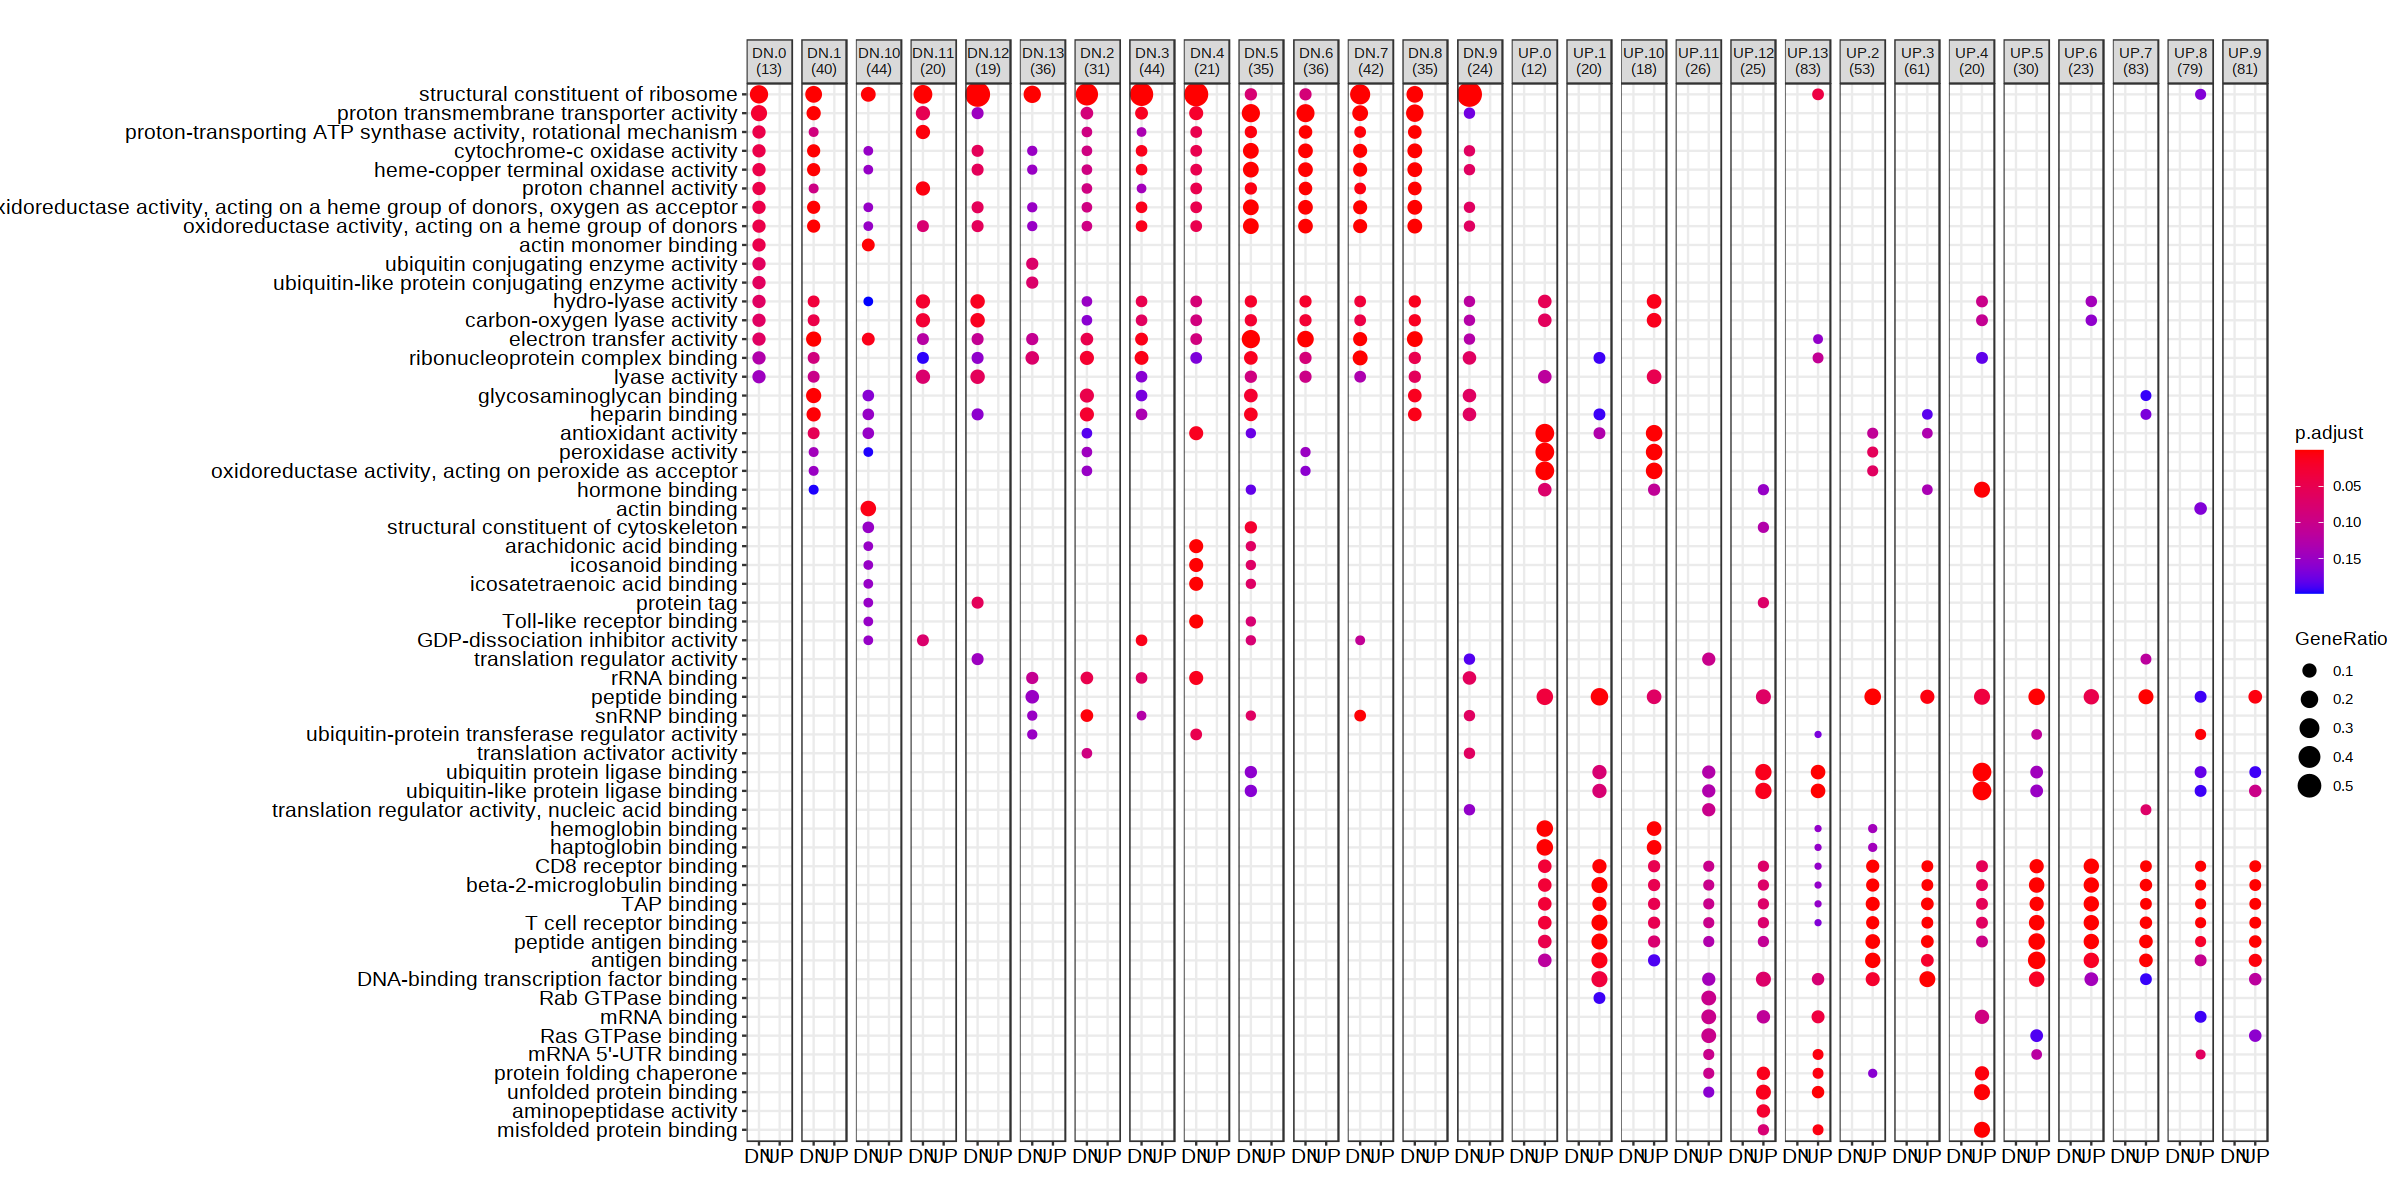

In [45]:
formula_res_MF <- compareCluster(ENTREZID~group+myCluster, data=all_degs, fun="enrichGO",
                                 OrgDb = org.Mm.eg.db,ont="MF",qvalueCutoff=0.5,pvalueCutoff=0.2)
options(repr.plot.width = 20, repr.plot.height = 10)
dotplot(formula_res_MF, x=~group) + ggplot2::facet_grid(~Cluster)


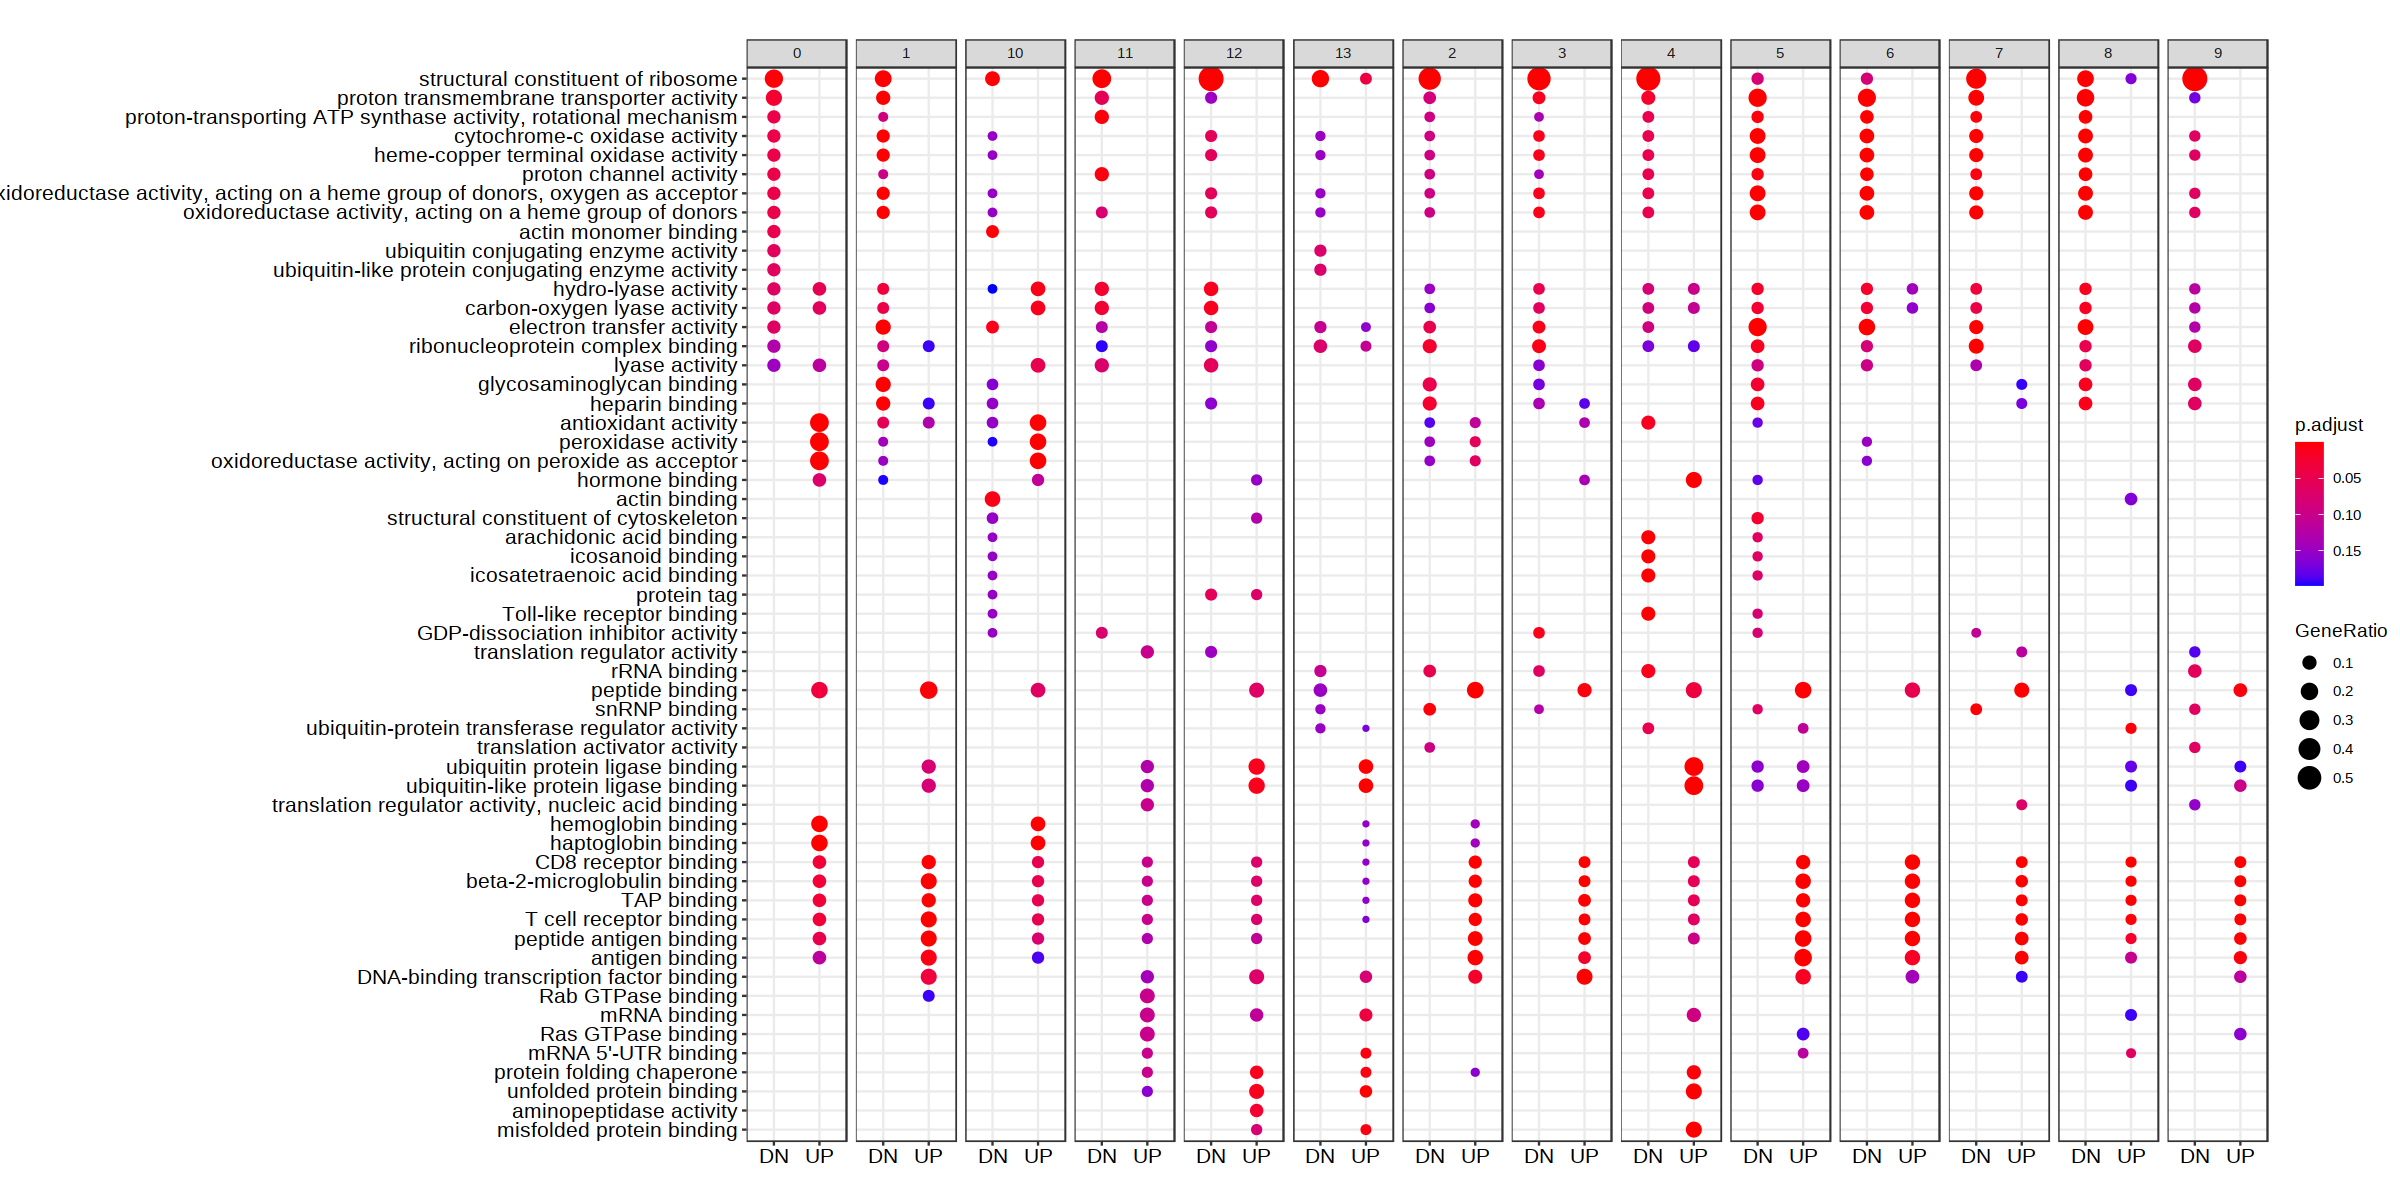

In [46]:
dotplot(formula_res_MF, x=~group) + ggplot2::facet_grid(~myCluster)


In [51]:
tmp = formula_res_MF
tmp@compareClusterResult = subset(tmp@compareClusterResult,p.adjust<=0.01)

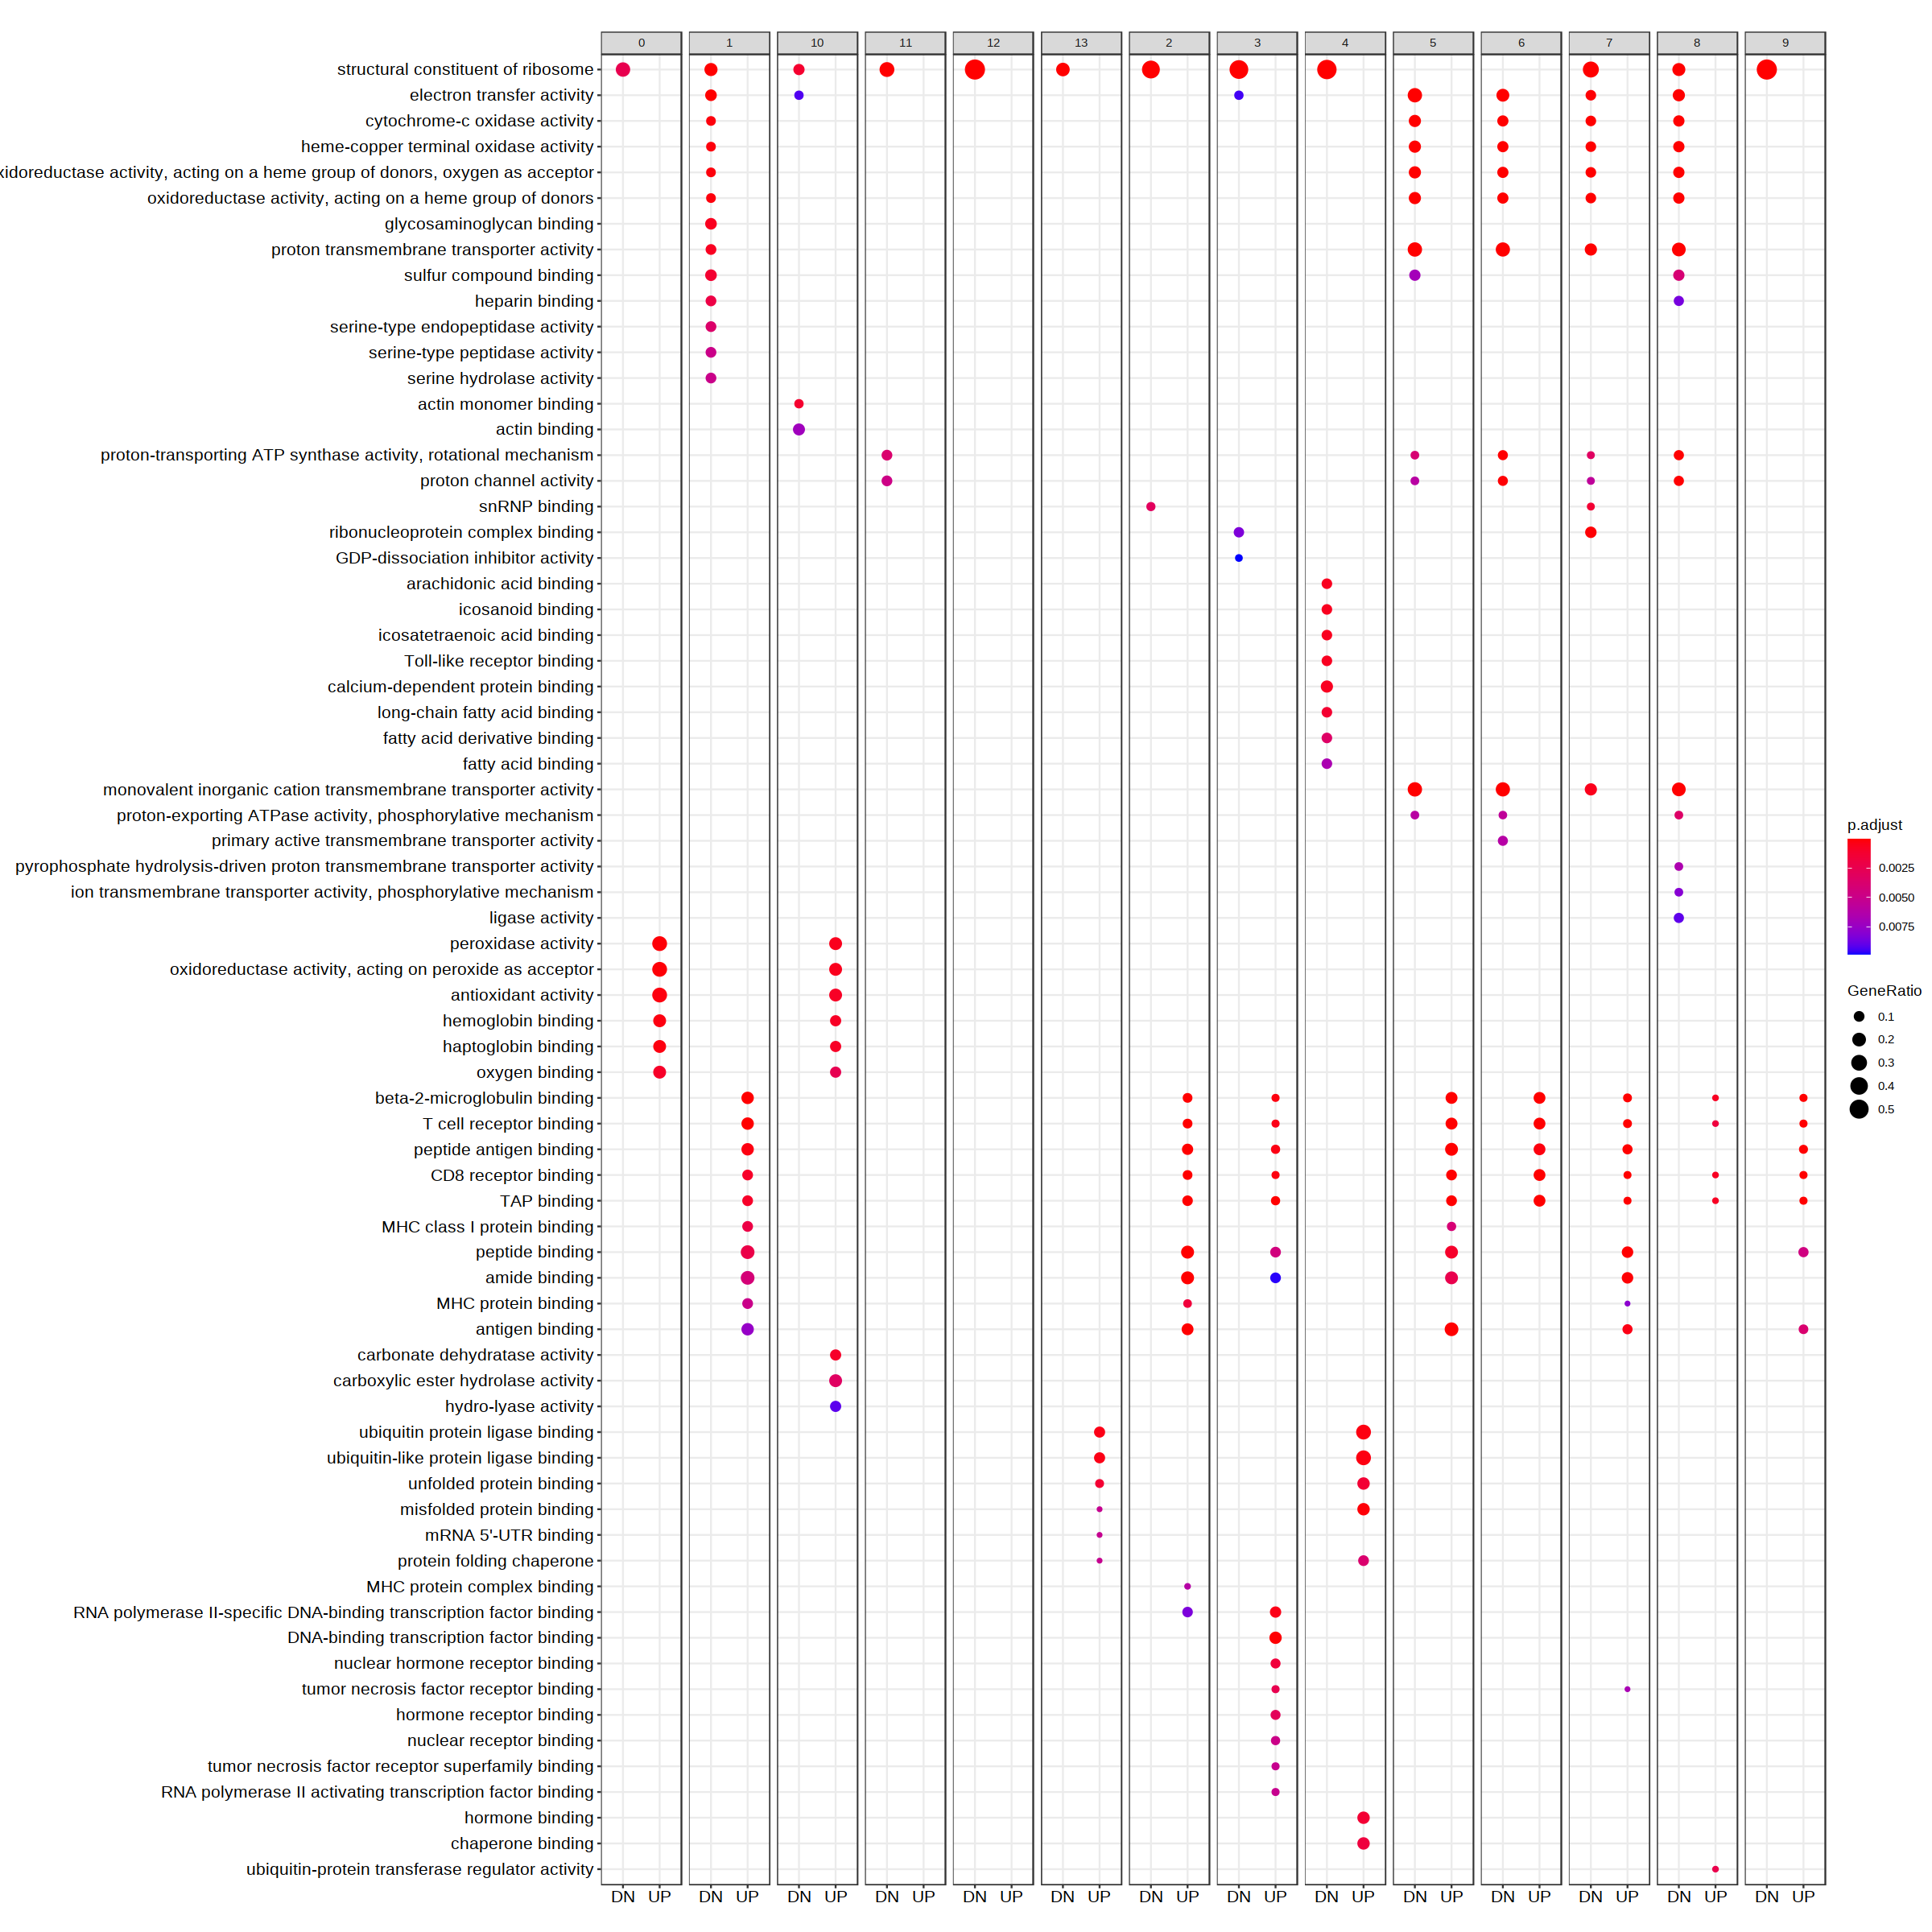

In [53]:
options(repr.plot.width = 20, repr.plot.height = 20)

dotplot(tmp, x=~group,showCategory=100) + ggplot2::facet_grid(~myCluster)


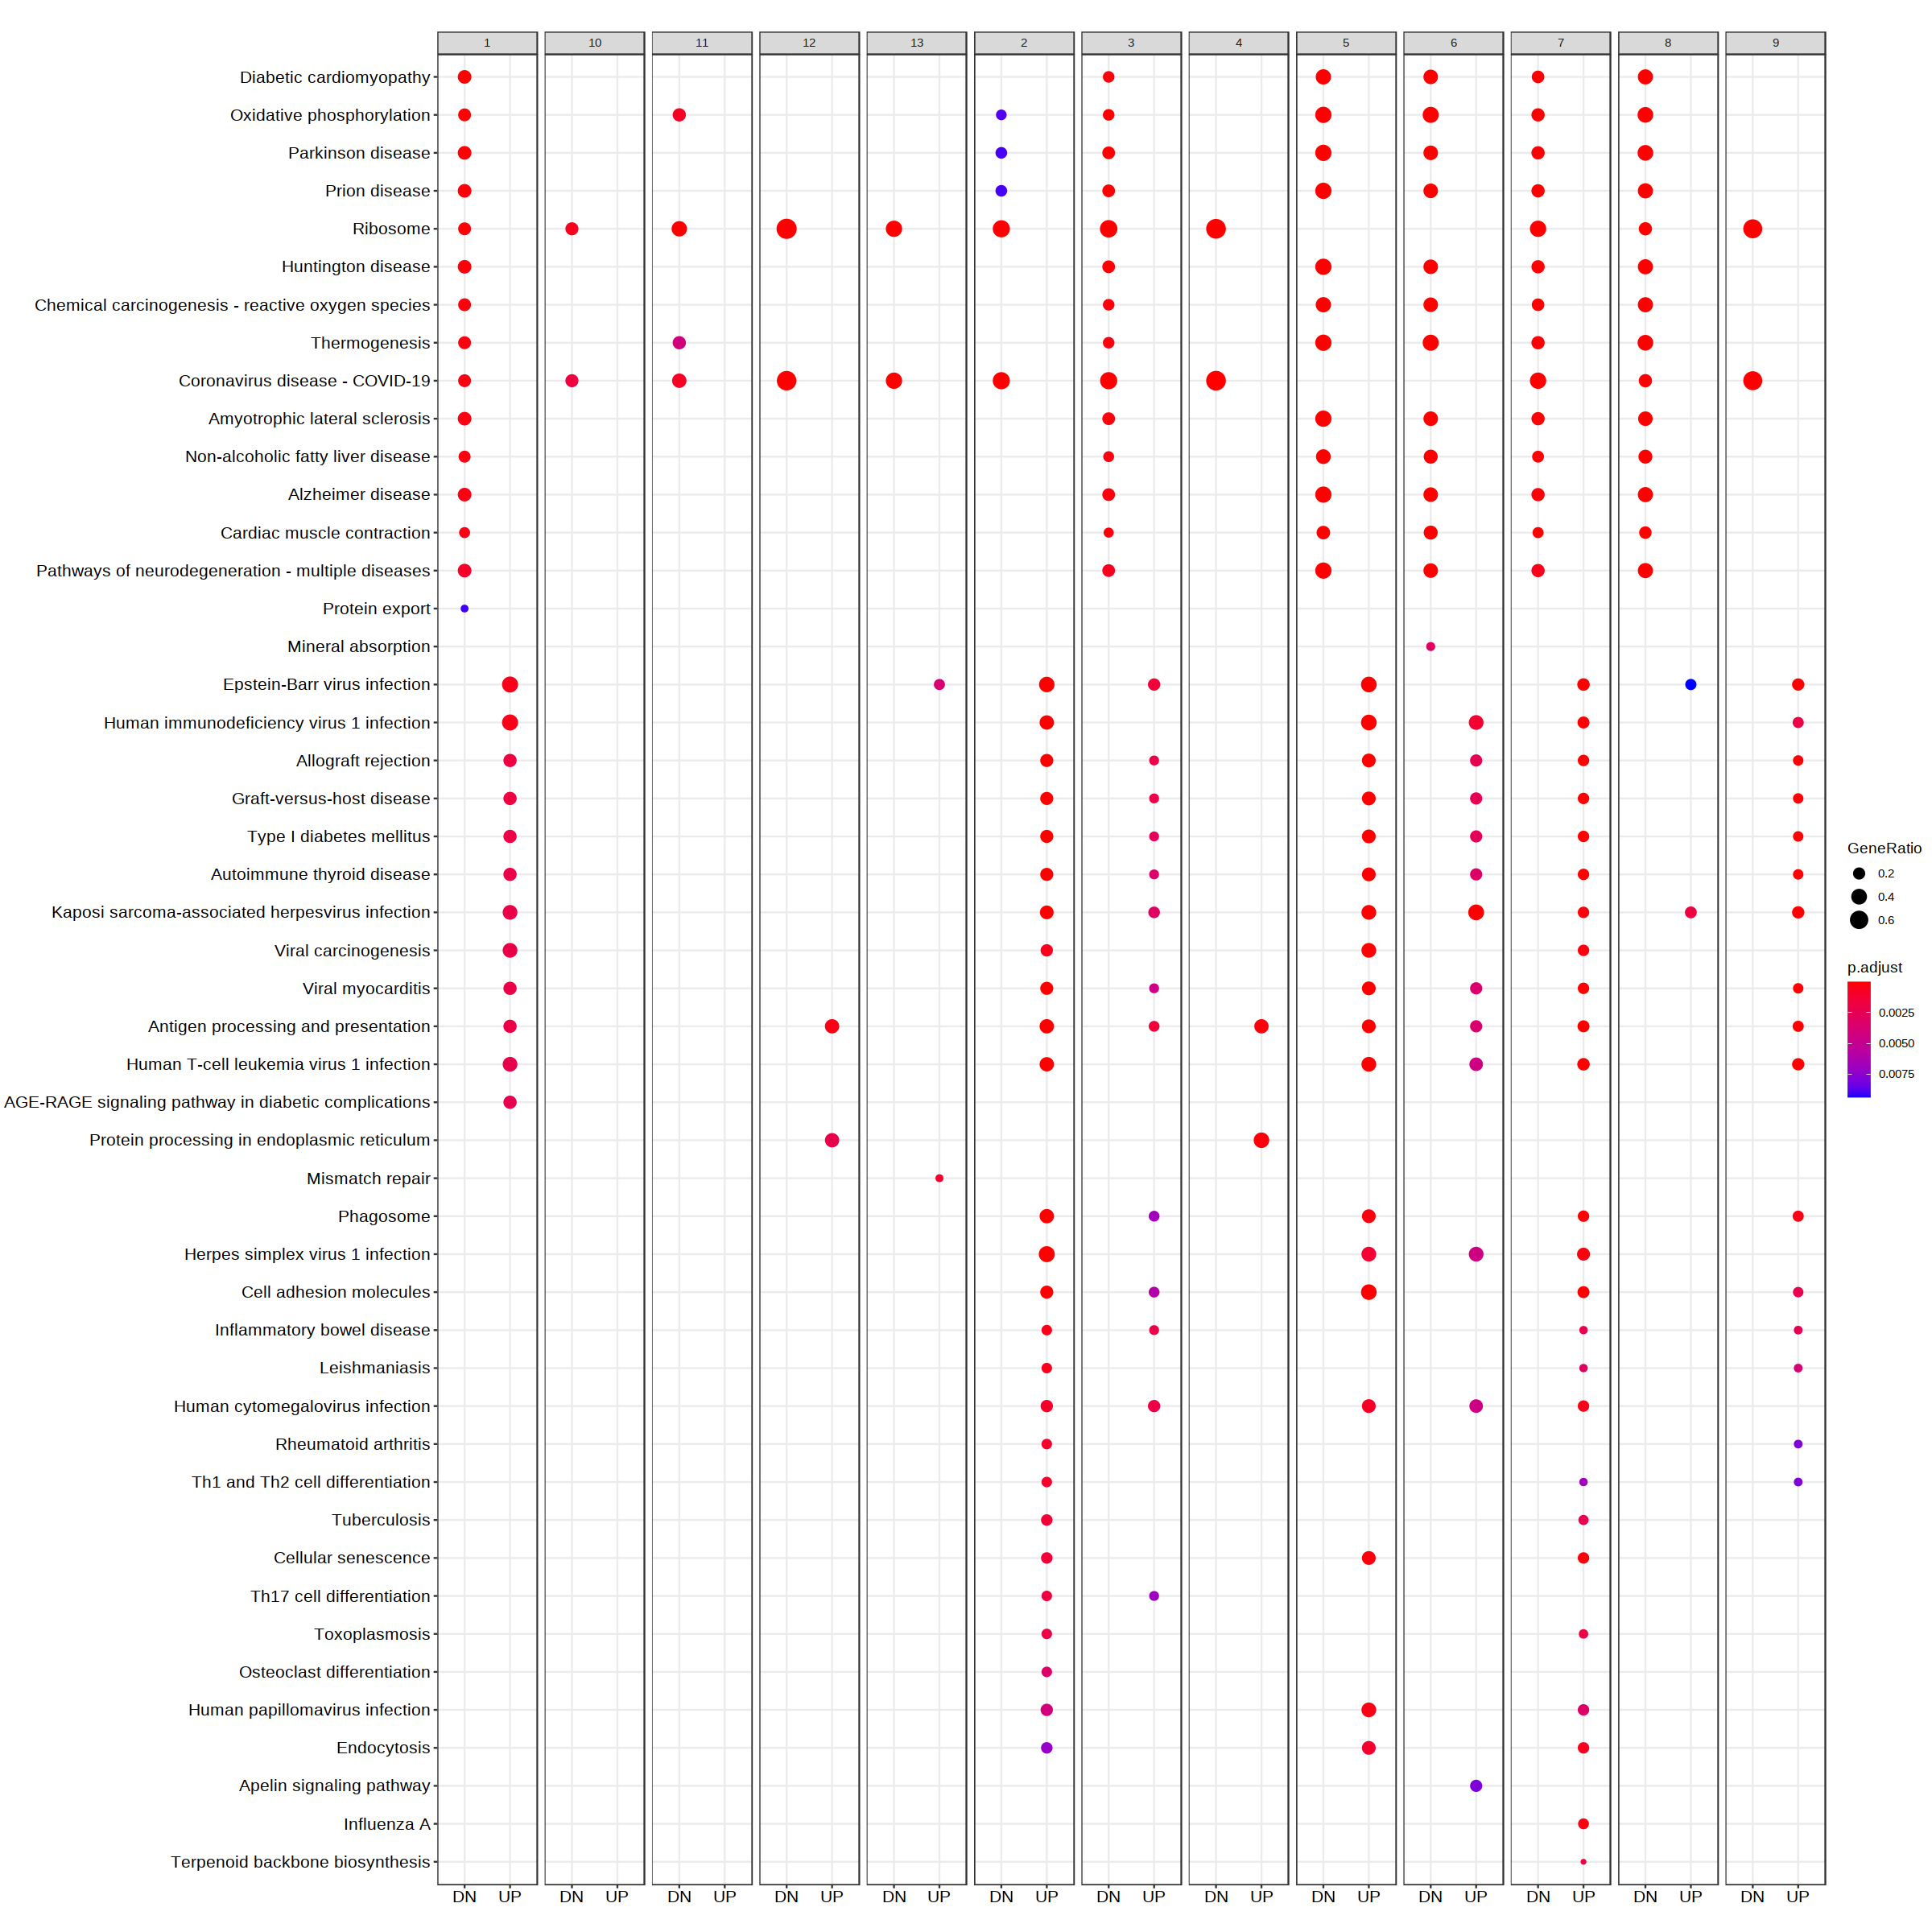

In [54]:
formula_res_MF2 <- compareCluster(ENTREZID~group+myCluster, data=all_degs, fun="enrichKEGG",organism="mmu",qvalueCutoff=0.5,pvalueCutoff=0.2)
tmp = formula_res_MF2
tmp@compareClusterResult = subset(tmp@compareClusterResult,p.adjust<=0.01)
options(repr.plot.width = 20, repr.plot.height = 20)
dotplot(tmp, x=~group,showCategory=100) + ggplot2::facet_grid(~myCluster)


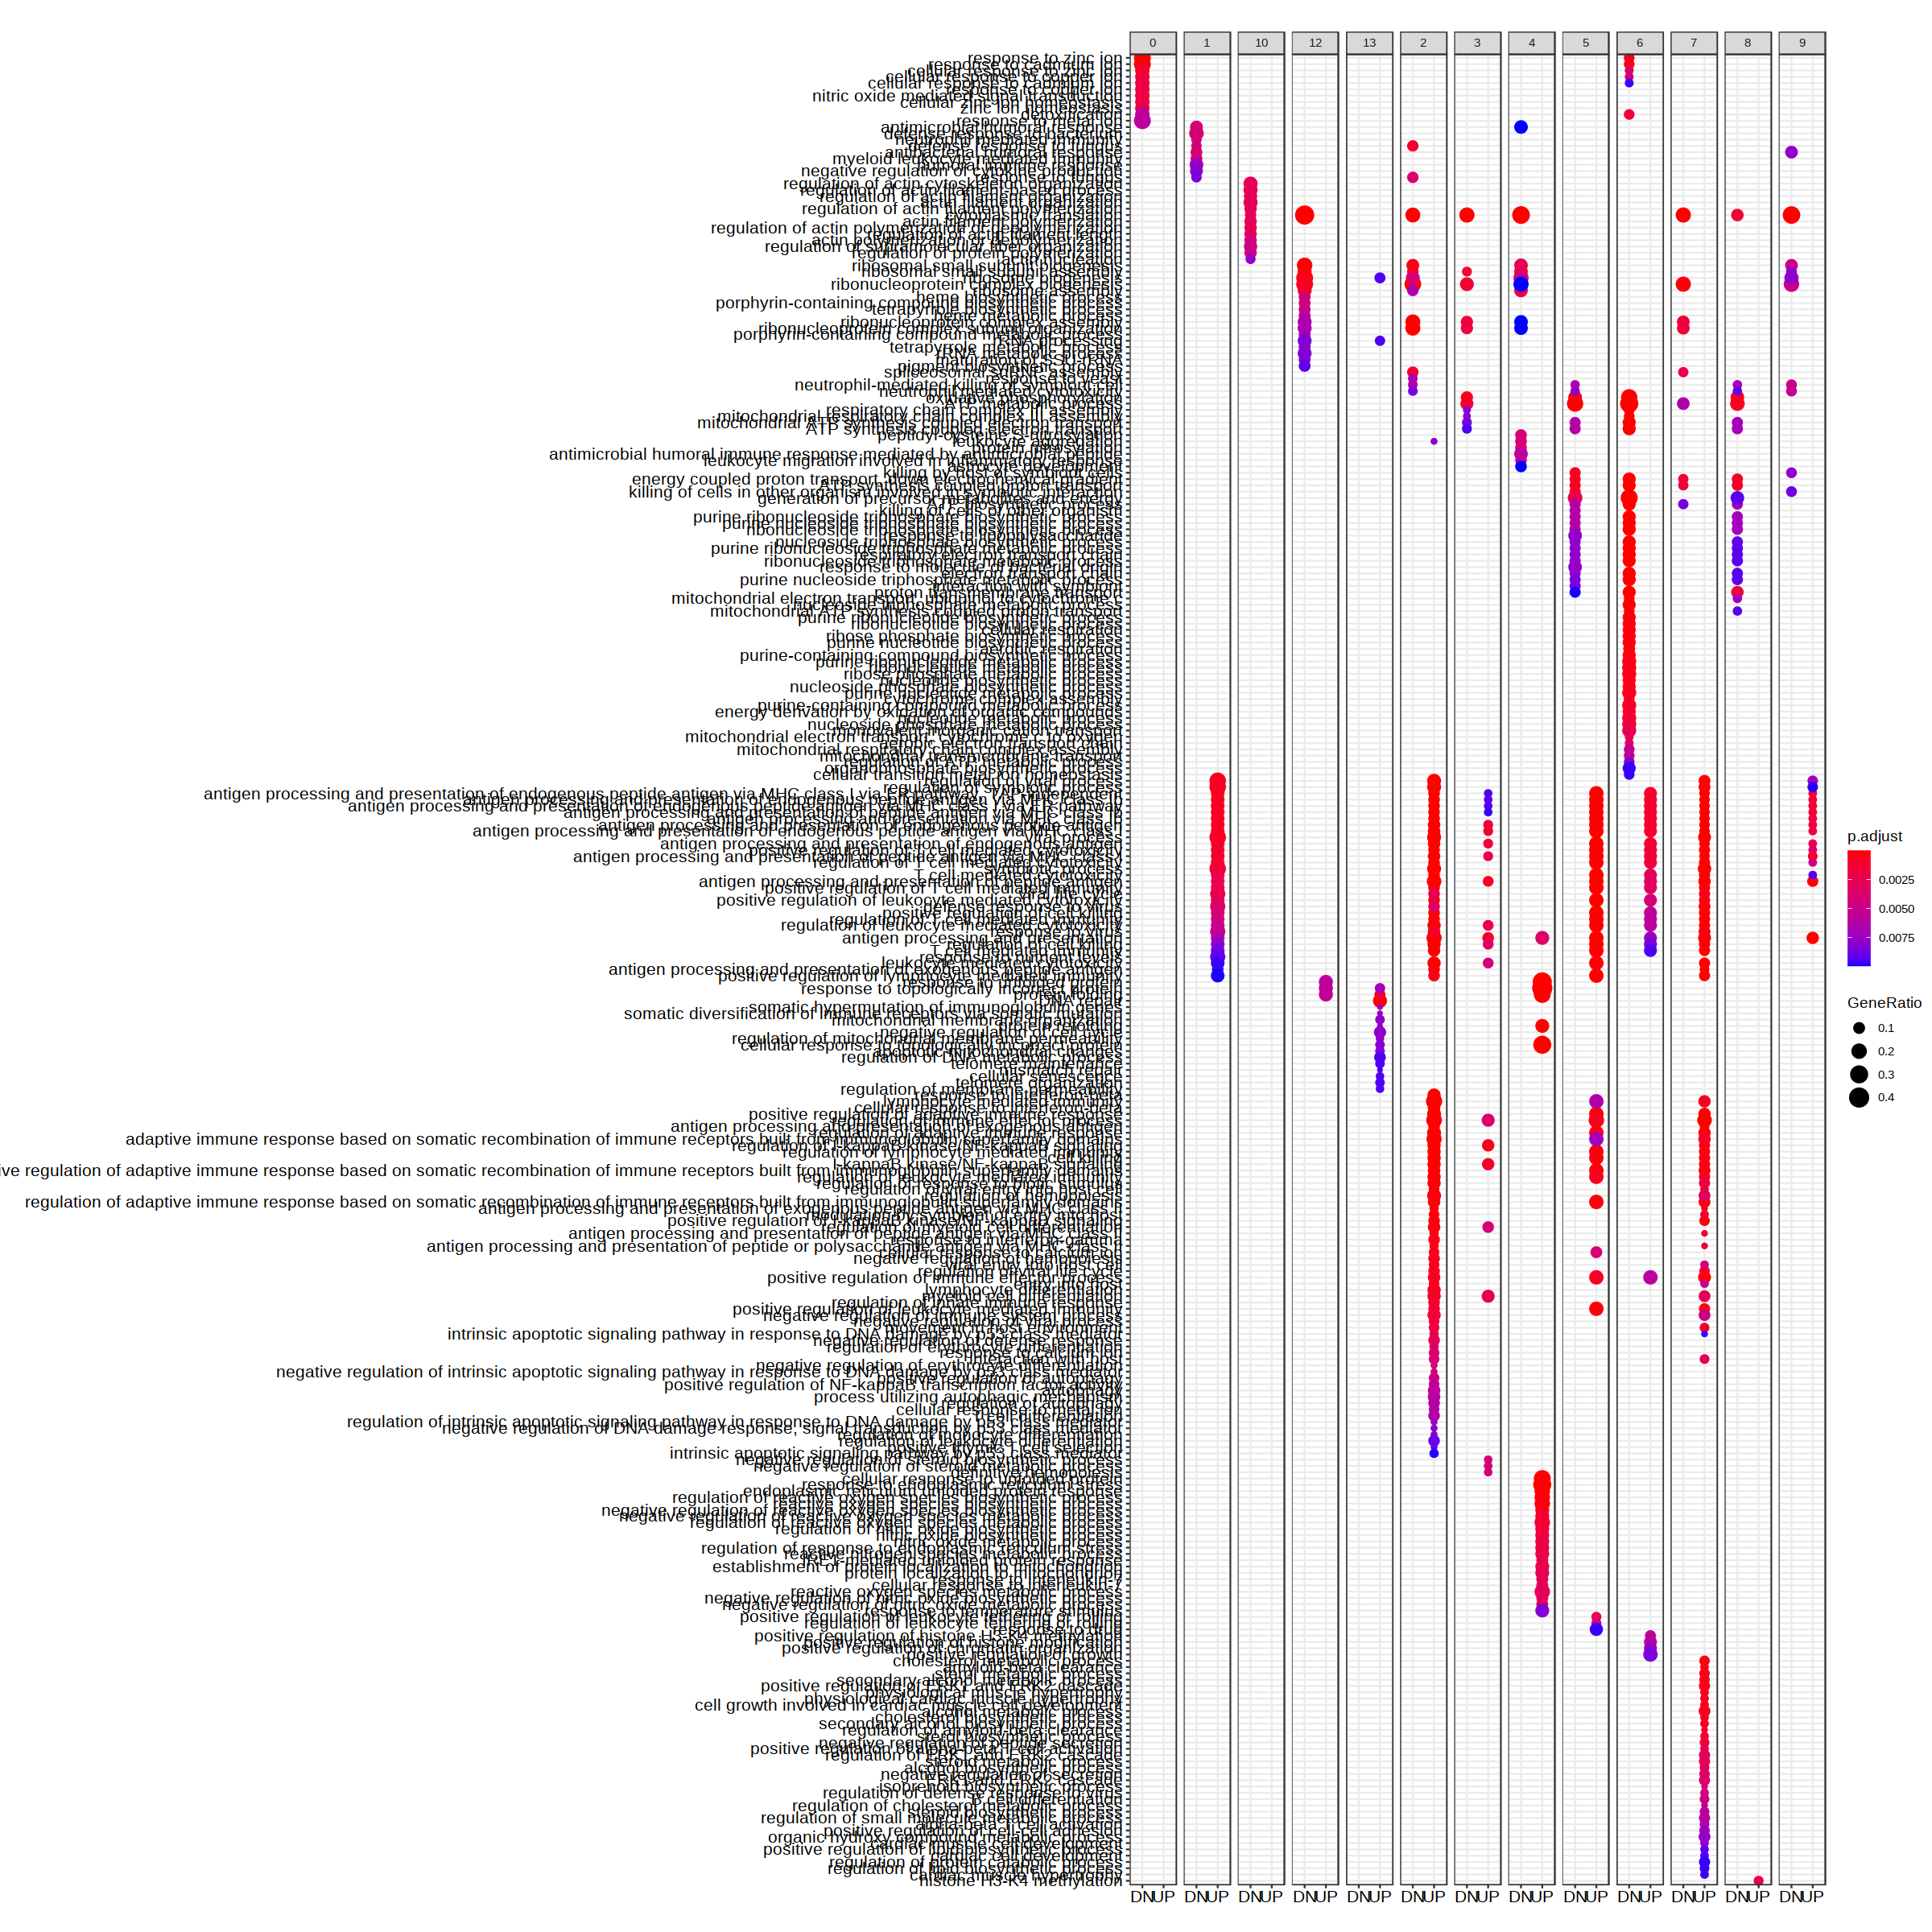

In [55]:
formula_res_MF2 <- compareCluster(ENTREZID~group+myCluster, data=all_degs, fun="enrichGO",
                                 OrgDb = org.Mm.eg.db,ont="BP",qvalueCutoff=0.5,pvalueCutoff=0.2)
tmp = formula_res_MF2
tmp@compareClusterResult = subset(tmp@compareClusterResult,p.adjust<=0.01)
options(repr.plot.width = 20, repr.plot.height = 20)
dotplot(tmp, x=~group,showCategory=100) + ggplot2::facet_grid(~myCluster)


In [56]:
formula_res_MF2 <- compareCluster(ENTREZID~group+myCluster, data=all_degs, fun="enrichGO",
                                 OrgDb = org.Mm.eg.db,ont="CC",qvalueCutoff=0.5,pvalueCutoff=0.2)
tmp = formula_res_MF2
tmp@compareClusterResult = subset(tmp@compareClusterResult,p.adjust<=0.01)
options(repr.plot.width = 20, repr.plot.height = 20)
dotplot(tmp, x=~group,showCategory=100) + ggplot2::facet_grid(~myCluster)


In [61]:
head(tmp@compareClusterResult)

Cluster group myCluster ID        
1    DN.0    DN    0         GO:0010043
9    DN.0    DN    0         GO:0055069
177  DN.1    DN    1         GO:0006959
1017 DN.2    DN    2         GO:0050832
1214 DN.3    DN    3         GO:0000028
1222 DN.3    DN    3         GO:0042773
     Description                              GeneRatio BgRatio   pvalue      
1    response to zinc ion                     3/12      32/23328  5.114850e-07
9    zinc ion homeostasis                     2/12      28/23328  9.101266e-05
177  humoral immune response                  6/41      406/23328 7.192683e-05
1017 defense response to fungus               3/33      35/23328  1.636638e-05
1214 ribosomal small subunit assembly         3/47      21/23328  9.937593e-06
1222 ATP synthesis coupled electron transport 3/47      61/23328  2.541399e-04
     p.adjust     qvalue       geneID                              Count
1    6.676038e-05 3.833132e-05 17025/17748/17750                   3    
9    2.002279e-03 1.149634e-03 17748/17750                         2    
177  7.480391e-03 5.754147e-03 67248/50701/13035/20568/21946/66214 6    
1017 1.395234e-03 1.087503e-03 50701/13035/17523                   3    
1214 1.162964e-03 8.987222e-04 75617/54127/67671                   3    
1222 9.472488e-03 7.320203e-03 67530/78330/12859                   3

Warning message in myCluster == c("0", "1", "2", "3", "4", "5", "6", "7"):
“longer object length is not a multiple of shorter object length”


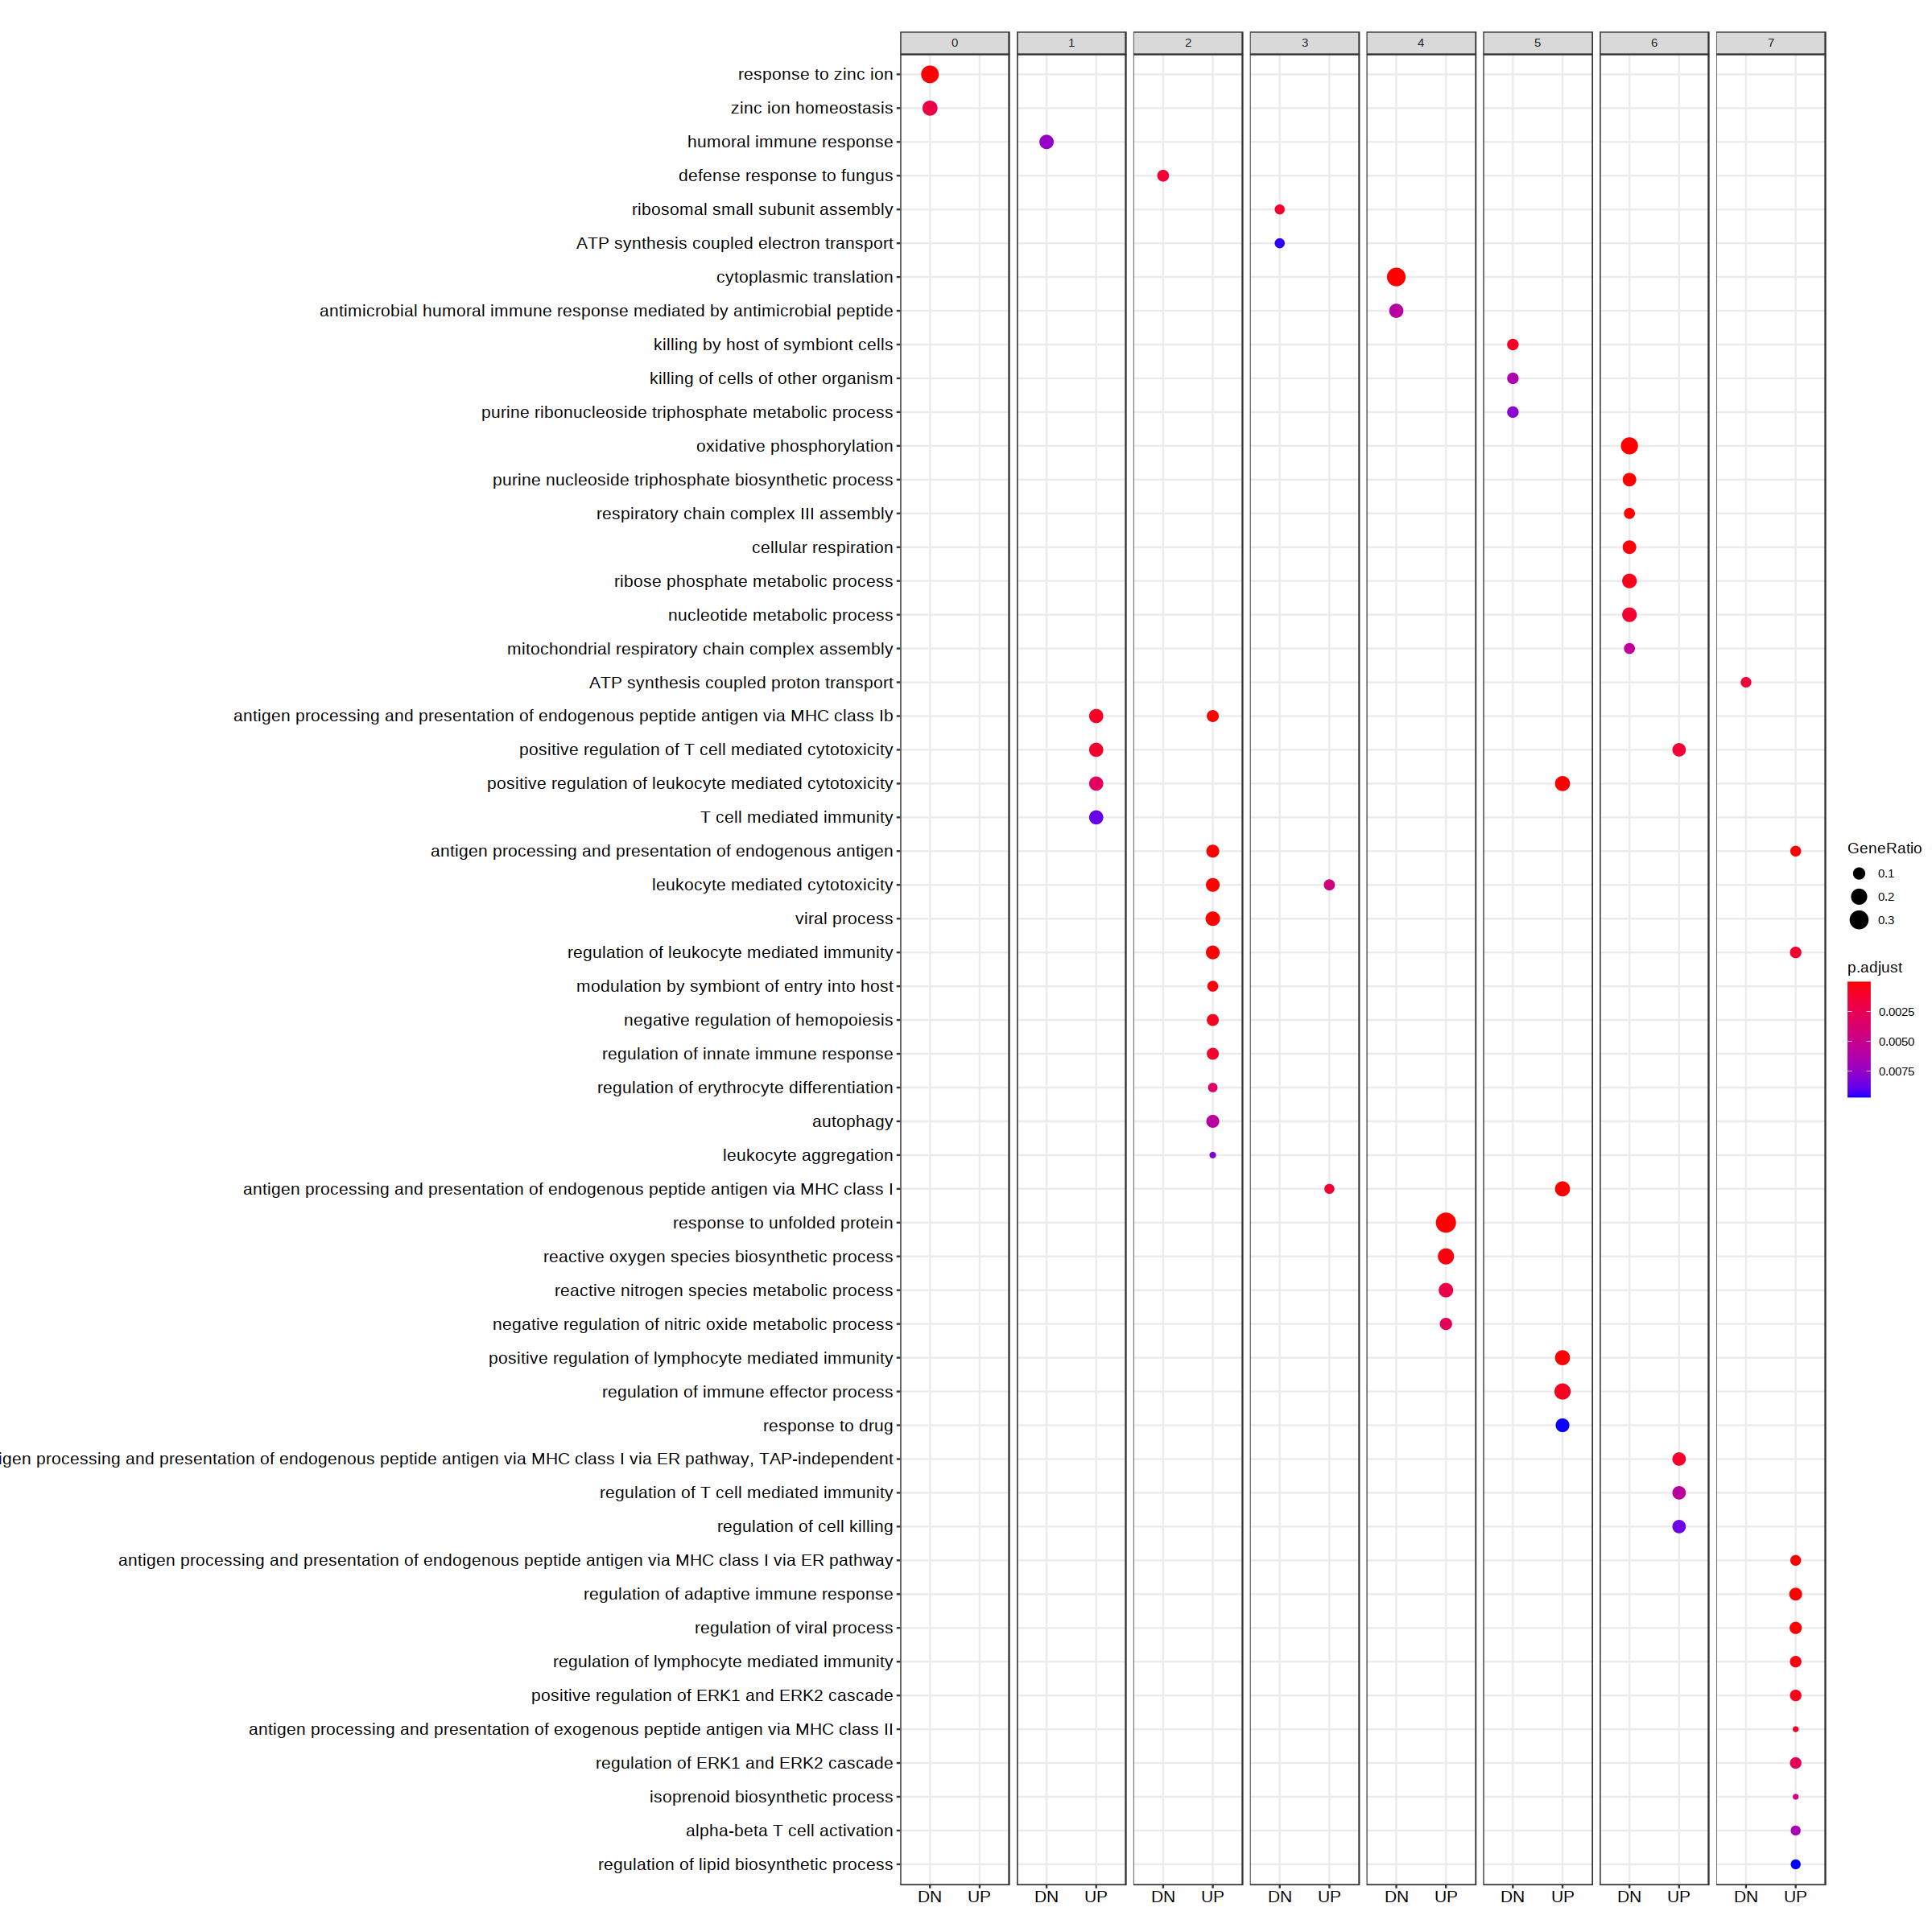

In [60]:
tmp = formula_res_MF2
tmp@compareClusterResult = subset(tmp@compareClusterResult,p.adjust<=0.01)
tmp@compareClusterResult = subset(tmp@compareClusterResult,myCluster==c("0","1","2","3","4","5","6","7"))

options(repr.plot.width = 20, repr.plot.height = 20)
dotplot(tmp, x=~group,showCategory=100) + ggplot2::facet_grid(~myCluster)

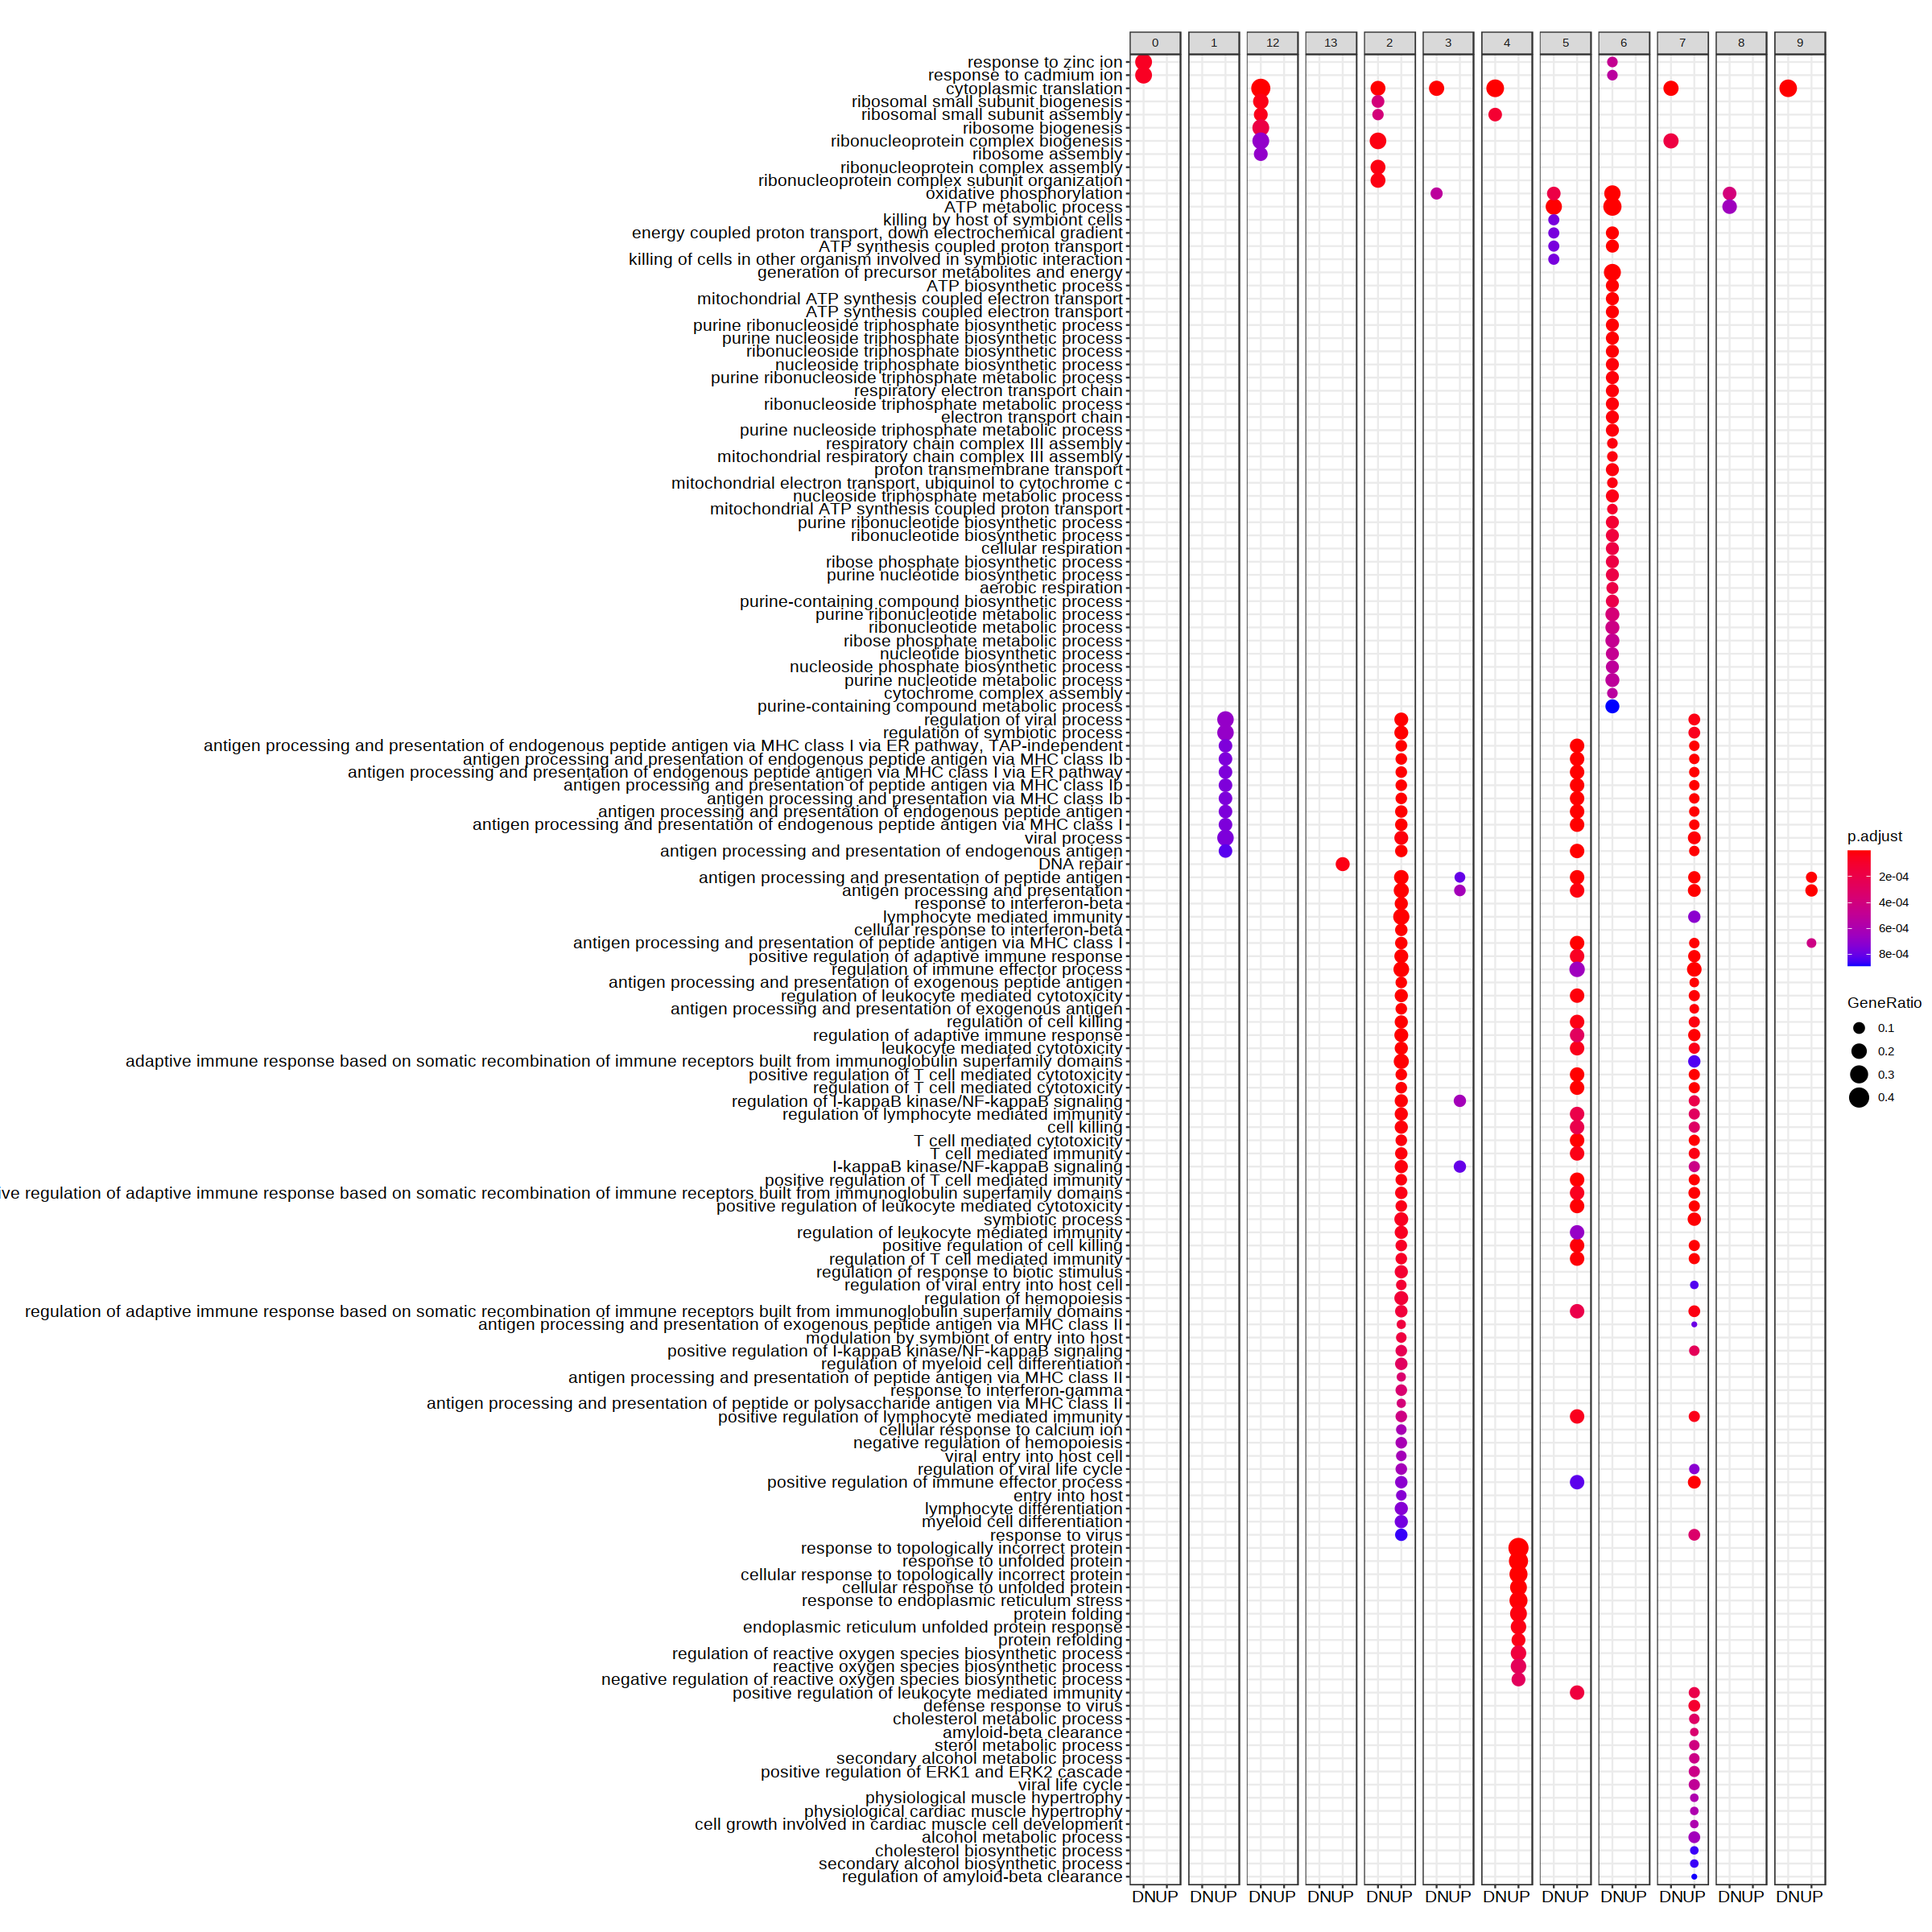

In [62]:
tmp = formula_res_MF2
tmp@compareClusterResult = subset(tmp@compareClusterResult,p.adjust<=0.001)
options(repr.plot.width = 20, repr.plot.height = 20)
dotplot(tmp, x=~group,showCategory=100) + ggplot2::facet_grid(~myCluster)

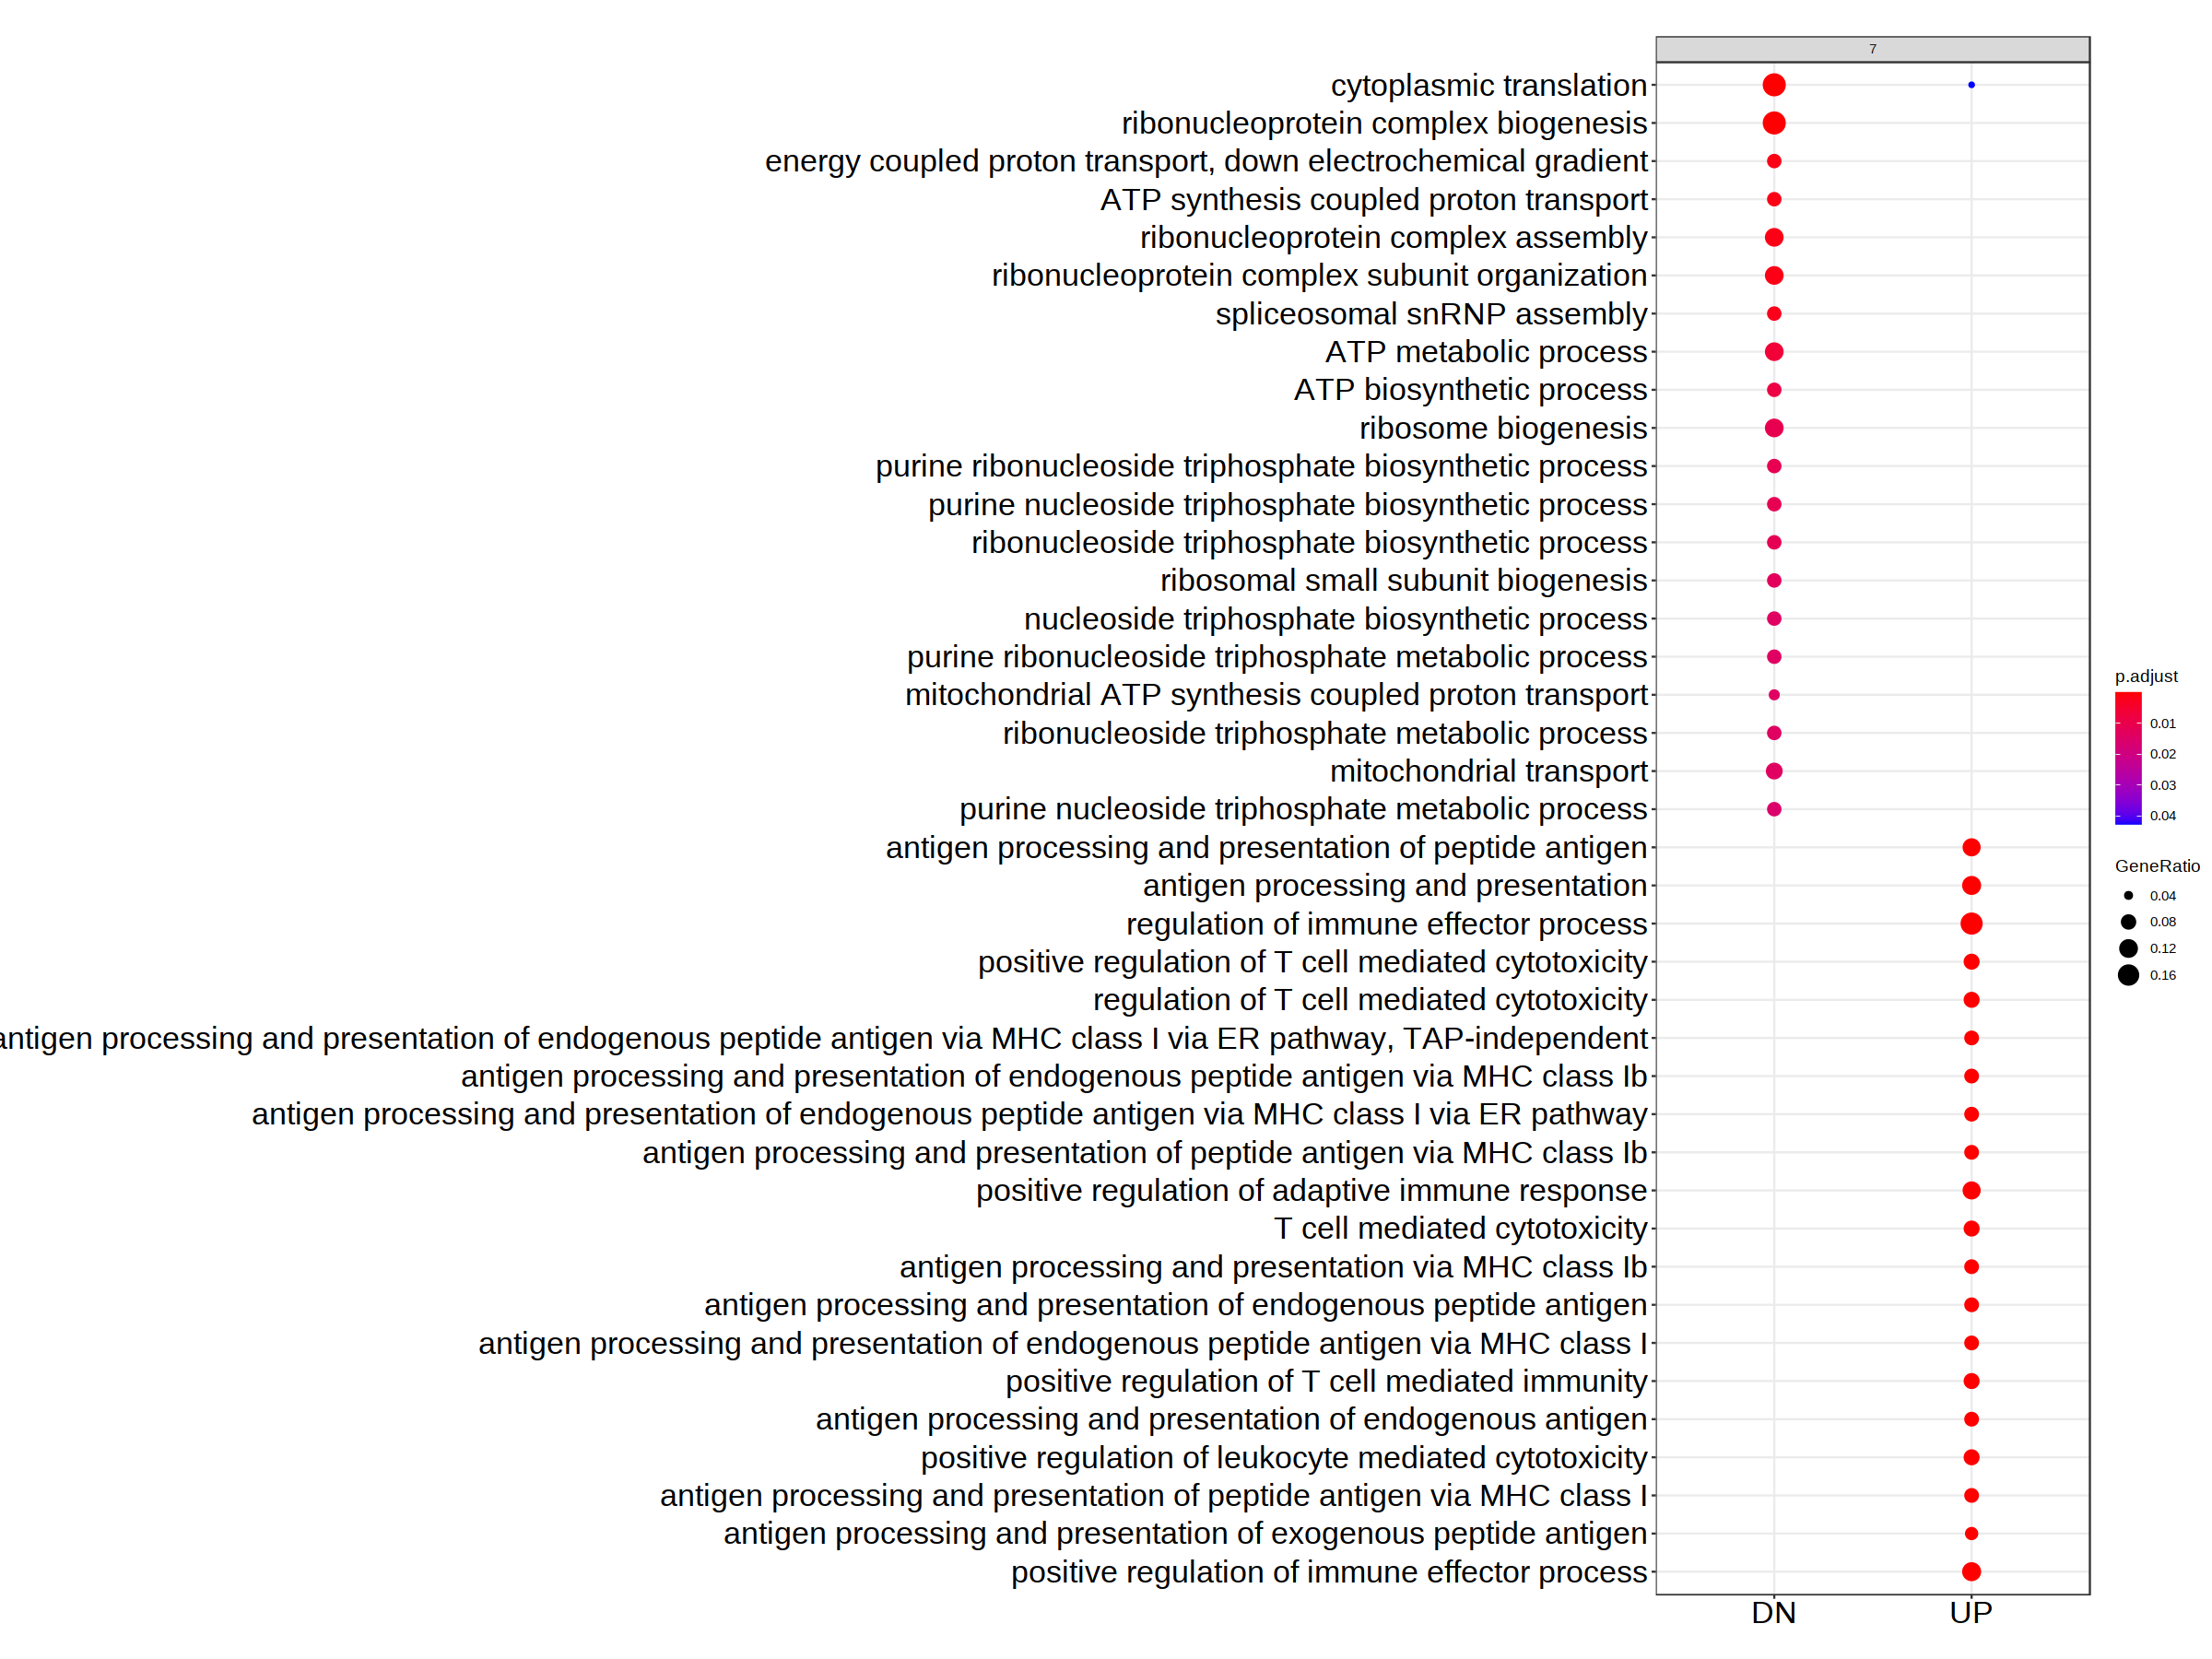

In [82]:
tmp = formula_res_MF2
tmp@compareClusterResult = subset(tmp@compareClusterResult,p.adjust<=0.05)
tmp@compareClusterResult = subset(tmp@compareClusterResult,myCluster=="7")

options(repr.plot.width = 20, repr.plot.height = 15)
dotplot(tmp, x=~group,showCategory=20) + ggplot2::facet_grid(~myCluster)+ 
   theme(axis.text.x = element_text(size=20),axis.text.y = element_text(size=20))

In [90]:
for (c in unique(formula_res_MF2@compareClusterResult$myCluster)){
    tmp = formula_res_MF2
    print (c)
    tmp@compareClusterResult = subset(tmp@compareClusterResult,p.adjust<=0.01)
    tmp@compareClusterResult = subset(tmp@compareClusterResult,myCluster==c)

    options(repr.plot.width = 20, repr.plot.height = 15)
    a=dotplot(tmp, x=~group,showCategory=20) + ggplot2::facet_grid(~myCluster)+ 
       theme(axis.text.x = element_text(size=20),axis.text.y = element_text(size=20),
            text = element_text(size = 20), element_line(size = 0.1)) 
    ggsave(paste("BP_enrichment.",c,".png", sep=""),plot=a,height=20,width=15,dpi=150)

    
}



ERROR: Error in `$<-.data.frame`(`*tmp*`, "Cluster", value = structure(NA_integer_, .Label = character(0), class = "factor")): replacement has 1 row, data has 0


In [108]:
for (c in c('0','1','10','12','13','2','3','4','5','6','7','8','9')){
    tmp = formula_res_MF2
    print (c)
    tmp@compareClusterResult = subset(tmp@compareClusterResult,p.adjust<=0.01)
    tmp@compareClusterResult = subset(tmp@compareClusterResult,myCluster==c)

    options(repr.plot.width = 20, repr.plot.height = 15)
    a=dotplot(tmp, x=~group,showCategory=20) + ggplot2::facet_grid(~myCluster)+ 
       theme(axis.text.x = element_text(size=20),axis.text.y = element_text(size=20),
            text = element_text(size = 20), element_line(size = 0.1)) 
    ggsave(paste("BP_enrichment.",c,".pdf", sep=""),plot=a,height=20,width=20,dpi=150)
    # png(paste("BP_enrichment.",c,".png", sep=""),height=1000,width=1200)
    # print (a)
    # dev.off()
    
}



[1] "0"
[1] "1"
[1] "10"
[1] "12"
[1] "13"
[1] "2"
[1] "3"
[1] "4"
[1] "5"
[1] "6"
[1] "7"
[1] "8"
[1] "9"


In [103]:
    png(paste("BP_enrichment.",c,".png", sep=""),height=20,width=15)
    print (a)
    dev.off()

png 
  2

In [107]:
?ggsave

ggsave                 package:ggplot2                 R Documentation

_S_a_v_e _a _g_g_p_l_o_t (_o_r _o_t_h_e_r _g_r_i_d _o_b_j_e_c_t) _w_i_t_h _s_e_n_s_i_b_l_e _d_e_f_a_u_l_t_s

_D_e_s_c_r_i_p_t_i_o_n:

     ‘ggsave()’ is a convenient function for saving a plot. It defaults
     to saving the last plot that you displayed, using the size of the
     current graphics device. It also guesses the type of graphics
     device from the extension.

_U_s_a_g_e:

     ggsave(
       filename,
       plot = last_plot(),
       device = NULL,
       path = NULL,
       scale = 1,
       width = NA,
       height = NA,
       units = c("in", "cm", "mm", "px"),
       dpi = 300,
       limitsize = TRUE,
       bg = NULL,
       ...
     )
     
_A_r_g_u_m_e_n_t_s:

filename: File name to create on disk.

    plot: Plot to save, defaults to last plot displayed.

  device: Device to use. Can either be a device function (e.g. png), or
          one of "eps", "ps", "tex" (pictex), "pdf", "jpeg", "tiff",
          "png", "bmp", "svg" or "wmf" (windows only).

    path: Path of the directory to save plot to: ‘path’ and ‘filename’
          are combined to create the fully qualified file name.
          Defaults to the working directory.

   scale: Multiplicative scaling factor.

width, height, units: Plot size in ‘units’ ("in", "cm", "mm", or "px").
          If not supplied, uses the size of current graphics device.

     dpi: Plot resolution. Also accepts a string input: "retina" (320),
          "print" (300), or "screen" (72). Applies only to raster
          output types.

limitsize: When ‘TRUE’ (the default), ‘ggsave()’ will not save images
          larger than 50x50 inches, to prevent the common error of
          specifying dimensions in pixels.

      bg: Background colour. If ‘NULL’, uses the ‘plot.background’ fill
          value from the plot theme.

     ...: Other arguments passed on to the graphics device function, as
          specified by ‘device’.

_D_e_t_a_i_l_s:

     Note: Filenames with page numbers can be generated by including a
     C integer format expression, such as %03d (as in the default file
     name for most R graphics devices, see e.g. ‘png()’). Thus,
     ‘filename = "figure%03d.png"’ will produce successive filenames
     ‘figure001.png’, ‘figure002.png’, ‘figure003.png’, etc. To write a
     filename containing the % sign, use ‘%%’. For example, ‘filename =
     "figure-100%%.png"’ will produce the filename figure-100%.png.

_S_a_v_i_n_g _i_m_a_g_e_s _w_i_t_h_o_u_t _g_g_s_a_v_e():

     In most cases ‘ggsave()’ is the simplest way to save your plot,
     but sometimes you may wish to save the plot by writing directly to
     a graphics device. To do this, you can open a regular R graphics
     device such as ‘png()’ or ‘pdf()’, print the plot, and then close
     the device using ‘dev.off()’. This technique is illustrated in the
     examples section.

_E_x_a_m_p_l_e_s:

     ## Not run:
     
     ggplot(mtcars, aes(mpg, wt)) +
       geom_point()
     
     ggsave("mtcars.pdf")
     ggsave("mtcars.png")
     
     ggsave("mtcars.pdf", width = 4, height = 4)
     ggsave("mtcars.pdf", width = 20, height = 20, units = "cm")
     
     # delete files with base::unlink()
     unlink("mtcars.pdf")
     unlink("mtcars.png")
     
     # specify device when saving to a file with unknown extension
     # (for example a server supplied temporary file)
     file <- tempfile()
     ggsave(file, device = "pdf")
     unlink(file)
     
     # save plot to file without using ggsave
     p <-
       ggplot(mtcars, aes(mpg, wt)) +
       geom_point()
     png("mtcars.png")
     print(p)
     dev.off()
     ## End(Not run)

In [109]:
all_degs

p_val         avg_log2FC pct.1 pct.2 p_val_adj     fdr           Cluster
1    1.731954e-111  0.6266801 1.000 1.000 5.378238e-107 5.715449e-110 0      
2     1.036221e-89 -0.5924145 0.394 0.772  3.217778e-85  1.709765e-88 0      
3     6.458310e-79 -0.2286484 0.998 0.999  2.005499e-74  7.104141e-78 0      
4     3.027118e-73 -0.5725872 0.970 0.994  9.400110e-69  2.497373e-72 0      
5     8.339120e-53 -0.2187751 0.999 1.000  2.589547e-48  5.503819e-52 0      
6     7.114065e-35 -0.2219852 0.995 1.000  2.209131e-30  3.912736e-34 0      
7     1.778083e-34  1.8829831 0.316 0.089  5.521480e-30  8.382389e-34 0      
8     4.531954e-34 -0.3063930 0.969 0.982  1.407308e-29  1.869431e-33 0      
9     2.707768e-30 -0.2310001 0.995 0.997  8.408432e-26  9.928483e-30 0      
10    5.415887e-30  0.2703238 0.974 0.973  1.681795e-25  1.787243e-29 0      
11    3.527521e-25 -0.2416961 0.986 0.995  1.095401e-20  1.058256e-24 0      
12    9.376104e-23  0.3460186 0.988 0.987  2.911562e-18  2.578429e-22 0      
13    1.168916e-21  0.2399519 0.980 0.962  3.629834e-17  2.967247e-21 0      
14    4.971502e-21 -0.2320351 0.980 0.991  1.543801e-16  1.171854e-20 0      
15    1.507389e-20 -0.2121045 0.983 0.998  4.680896e-16  3.316257e-20 0      
16    9.287380e-20 -0.2557173 0.986 0.990  2.884010e-15  1.915522e-19 0      
17    3.614835e-19 -0.2364132 0.927 0.956  1.122515e-14  7.017033e-19 0      
18    2.047105e-17  0.2169160 0.760 0.622  6.356876e-13  3.674618e-17 0      
19    2.115689e-17 -0.2739129 0.938 0.972  6.569849e-13  3.674618e-17 0      
20    3.474573e-15  0.3071749 0.848 0.768  1.078959e-10  5.733045e-15 0      
21    4.363562e-13  0.2308883 0.589 0.427  1.355017e-08  6.857027e-13 0      
22    5.241755e-13  0.2151406 0.921 0.869  1.627722e-08  7.862633e-13 0      
23    5.957325e-13  0.2410839 0.878 0.751  1.849928e-08  8.547466e-13 0      
24    6.928752e-13  1.5699647 0.353 0.483  2.151585e-08  9.527034e-13 0      
25    9.898327e-13  0.2178911 0.846 0.737  3.073727e-08  1.306579e-12 0      
26    1.371130e-11  0.2723928 0.746 0.597  4.257771e-07  1.740281e-11 0      
27    2.368499e-09  0.3571423 0.757 0.629  7.354899e-05  2.894832e-09 0      
28    2.135439e-05 -0.2346991 0.865 0.864  6.631180e-01  2.516768e-05 0      
29    2.946185e-05  0.2390613 0.818 0.835  9.148789e-01  3.352556e-05 0      
30    3.326031e-05  0.2362425 0.943 0.946  1.000000e+00  3.658634e-05 0      
⋮    ⋮             ⋮          ⋮     ⋮     ⋮             ⋮             ⋮      
1155 0.003857982    0.2053775 0.467 0.287 1             0.007978158   13     
1156 0.004045369   -0.2571022 0.778 0.816 1             0.008285227   13     
1157 0.004193250    0.2125961 0.467 0.299 1             0.008506307   13     
1158 0.004276361    0.2301770 0.859 0.701 1             0.008593066   13     
1159 0.004371704   -0.2629115 0.207 0.320 1             0.008694400   13     
1160 0.004408428   -0.3407621 0.481 0.537 1             0.008694400   13     
1161 0.004537704    0.2013106 0.548 0.361 1             0.008849860   13     
1162 0.004570350    0.2443248 0.770 0.652 1             0.008849860   13     
1163 0.004663198    0.2373892 0.593 0.406 1             0.008906533   13     
1164 0.004683247    0.2330133 0.919 0.766 1             0.008906533   13     
1165 0.004736753   -0.3680106 0.548 0.676 1             0.008928570   13     
1166 0.004823401    0.2230529 0.904 0.770 1             0.009012143   13     
1167 0.005027430    0.2394565 0.444 0.295 1             0.009253139   13     
1168 0.005050943   -0.4666417 0.541 0.656 1             0.009253139   13     
1169 0.005082710    0.2256031 0.622 0.422 1             0.009253139   13     
1170 0.005159323   -0.3415783 0.496 0.537 1             0.009313016   13     
1171 0.005297304   -0.3759840 0.400 0.520 1             0.009413694   13     
1172 0.005321255    0.2177229 0.593 0.447 1             0.009413694   13     
1173 0.005347685    0.2106118 0.296 0.164 1             0.009413694   13     
1174 0.005473098    0.20148